In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\2954675577.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')


In [4]:
loan_data = loan_data_backup.copy()

In [5]:
#loan_data.head()
#loan_data.columns
pd.options.display.max_columns = None
loan_data=loan_data.drop('Unnamed: 0', axis=1)


In [6]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00        

In [7]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Pre-processing the continuous variable

In [9]:
## converting 'emp_length' to integer
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:

loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('10+','10')
loan_data['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [11]:
print(type(loan_data['emp_length_int'][0]))
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
print(type(loan_data['emp_length_int'][0]))

<class 'str'>
<class 'numpy.float64'>


In [12]:
## converting 'term' to integer
print(loan_data['term'].unique())
loan_data['term_int'] = loan_data['term'].str.replace(' 36 months', '36')
loan_data['term_int'] = loan_data['term_int'].str.replace(' 60 months', '60')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])
print(loan_data['term_int'].unique())

[' 36 months' ' 60 months']
[36 60]


In [13]:
## converting 'issue date' to integer
print(loan_data['issue_d'].unique())
loan_data['mths_since_issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['mths_since_issue_d']) / np.timedelta64(1, 'D')/30))
print(loan_data['mths_since_issue_d'].unique())
print(loan_data['mths_since_issue_d'].describe())
# loan_data['term_int'] = loan_data['term'].str.replace(' 36 months', '36')
# loan_data['term_int'] = loan_data['term_int'].str.replace(' 60 months', '60')
# loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])
# print(loan_data['term_int'].unique())

['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07' 'Dec-13'
 'Nov-13' 'Oct-13' 'Sep-13' 'Aug-13' 'Jul-13' 'Jun-13' 'May-13' 'Apr-13'
 'Mar-13' 'Feb-13' 'Jan-13' 'Dec-12' 'Nov-12' 'Oct-12' 'Sep-12' 'Aug-12'
 'Jul-12' 'Jun-12' 'May-12' 'Apr-12' 'Mar-12' 'Feb-12' 'Jan-12' 'Dec-14'
 'Nov-14' 'Oct-14' 'Sep-14' 'Aug-14' 'Jul-14' 'Jun-14' 'May-14' 'Apr-14'
 'Mar-14' 'Feb-14' 'Jan-14']
[ 73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 101. 102. 104. 105. 106. 

In [14]:
###' earliest credit line
print(loan_data['earliest_cr_line'])

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object


In [15]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
print(type(loan_data['earliest_cr_line_date'][0]))
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [16]:
#using 'D'/30 instead of 'M' for time delta 
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'D')/30))

In [17]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.979220
std          95.344015
min        -621.000000
25%         186.000000
50%         228.000000
75%         289.000000
max         596.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [18]:
#checking with negative months
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -545.0
1770             Sep-68            2068-09-01                       -618.0
2799             Sep-64            2064-09-01                       -569.0
3282             Sep-67            2067-09-01                       -606.0
3359             Feb-65            2065-02-01                       -574.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -610.0
464260           Jul-66            2066-07-01                       -591.0
465100           Oct-67            2067-10-01                       -607.0
465500           Sep-67            2067-09-01                       -606.0
465655           Jan-56            2056-01-01                       -464.0

[1169 rows x 3 columns]

In [19]:
loan_data['mths_since_earliest_cr_line'].max()

596.0

In [20]:
## assigning negative values with maximum observed value
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
print(loan_data['mths_since_earliest_cr_line'].min())
print(loan_data['mths_since_earliest_cr_line'].describe())

74.0
count    466256.000000
mean        245.925734
std          87.722725
min          74.000000
25%         187.000000
50%         229.000000
75%         289.000000
max         596.000000
Name: mths_since_earliest_cr_line, dtype: float64


C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\2151979358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


## Pre-processing Discrete Variables

In [21]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

loan_data_dummies

[        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
 0         False     True    False    False    False    False    False
 1         False    False     True    False    False    False    False
 2         False    False     True    False    False    False    False
 3         False    False     True    False    False    False    False
 4         False     True    False    False    False    False    False
 ...         ...      ...      ...      ...      ...      ...      ...
 466280    False    False     True    False    False    False    False
 466281    False    False    False     True    False    False    False
 466282    False    False    False     True    False    False    False
 466283     True    False    False    False    False    False    False
 466284    False    False    False     True    False    False    False
 
 [466285 rows x 7 columns],
         sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
 0              False         False  

In [22]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1) ## axis =1 is columns
print(loan_data_dummies)
type(loan_data_dummies)


        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0         False     True    False    False    False    False    False   
1         False    False     True    False    False    False    False   
2         False    False     True    False    False    False    False   
3         False    False     True    False    False    False    False   
4         False     True    False    False    False    False    False   
...         ...      ...      ...      ...      ...      ...      ...   
466280    False    False     True    False    False    False    False   
466281    False    False    False     True    False    False    False   
466282    False    False    False     True    False    False    False   
466283     True    False    False    False    False    False    False   
466284    False    False    False     True    False    False    False   

        sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
0              False         False         

pandas.core.frame.DataFrame

In [23]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)
print(loan_data.columns.values)

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'pymnt_plan' 'url' 'desc' 'purpose' 'title' 'zip_code'
 'addr_state' 'dti' 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths'
 'mths_since_last_delinq' 'mths_since_last_record' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'initial_list_status' 'out_prncp'
 'out_prncp_inv' 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp'
 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt' 'next_pymnt_d'
 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'mths_since_last_major_derog' 'policy_code' 'application_type'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint'
 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m' 'open_il_6m'
 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il' 'total_bal_il' 'il_ut

## treatment of missing values

In [24]:
#print(loan_data.isnull())
pd.options.display.max_rows=None
print(loan_data.isnull().sum())

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [25]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace=True)
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [26]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [27]:
#loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [28]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)

In [29]:
print(loan_data.isnull().sum())

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [30]:
print(loan_data['mths_since_earliest_cr_line'].isnull().sum())

0


## PD MODEL

## Data Preparation
Dependent Variable, Good/Bad(default) definition, default and non-default accounts.

In [31]:
print(loan_data['loan_status'].unique())
print("Loan status count")
print(loan_data['loan_status'].value_counts())
print("Percentage of loan status")
print(loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()*100)

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
Loan status count
loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64
Percentage of loan status
loan_status
Current                                                48.087757
Fully Paid                                             39.619332


In [32]:
loan_data['good_bad']= np.where(loan_data['loan_status'].isin(['Charged Off' ,'Default' ,'Late (31-120 days)', 'Late (16-30 days)','Does not meet the credit policy. Status:Charged Off']),0,1)

In [33]:
loan_data['good_bad'].unique()

array([1, 0])

## TEST AND TRAIN
## Bundling and converting continuous to discrete-- this is called fine classing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

In [36]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape) ## vector of lengths
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)## vector of lengths

(349713, 205)
(349713,)
(116572, 205)
(116572,)


In [128]:
## 80:20 split
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)
## shuffling is true by default,everytime we run we get different output.Setting random state would yield same output every time we run

In [129]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape) ## vector of lengths
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)## vector of lengths

(373028, 205)
(373028,)
(93257, 205)
(93257,)


In [218]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train
# df_inputs_prepr = loan_data_inputs_test
# df_targets_prepr = loan_data_targets_test

In [220]:
print(df_inputs_prepr.shape)
print(df_targets_prepr.shape)

(373028, 205)
(373028,)


In [221]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [222]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

grade  good_bad
427211     A         1
206088     C         1
136020     A         1
412305     D         0
36159      C         0

In [223]:
print(df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count())
## good borrowers, as good_bad=1 is good
print(df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean())
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
df1 = df1.iloc[: , [0, 1, 3]]
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum() ## weights
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()

print(df1)

  grade  good_bad
0     A     59759
1     B    109730
2     C    100245
3     D     61498
4     E     28612
5     F     10530
6     G      2654
  grade  good_bad
0     A  0.960357
1     B  0.919156
2     C  0.882877
3     D  0.842597
4     E  0.800189
5     F  0.748813
6     G  0.722683
  grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.722683    0.007115    1918.0    736.0     0.005790   
1     F   10530   0.748813    0.028228    7885.0   2645.0     0.023802   
2     E   28612   0.800189    0.076702   22895.0   5717.0     0.069113   
3     D   61498   0.842597    0.164862   51818.0   9680.0     0.156423   
4     C  100245   0.882877    0.268733   88504.0  11741.0     0.267167   
5     B  109730   0.919156    0.294160  100859.0   8871.0     0.304463   
6     A   59759   0.960357    0.160200   57390.0   2369.0     0.173243   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017625 -1.113208             NaN       NaN  0.2917

## Function for calculating WoE

In [224]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [225]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0     G    2654   0.722683    0.007115    1918.0    736.0     0.005790   
1     F   10530   0.748813    0.028228    7885.0   2645.0     0.023802   
2     E   28612   0.800189    0.076702   22895.0   5717.0     0.069113   
3     D   61498   0.842597    0.164862   51818.0   9680.0     0.156423   
4     C  100245   0.882877    0.268733   88504.0  11741.0     0.267167   
5     B  109730   0.919156    0.294160  100859.0   8871.0     0.304463   
6     A   59759   0.960357    0.160200   57390.0   2369.0     0.173243   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.017625 -1.113208             NaN       NaN  0.291771  
1    0.063340 -0.978725        0.026130  0.134483  0.291771  
2    0.136905 -0.683541        0.051376  0.295183  0.291771  
3    0.231806 -0.393340        0.042408  0.290201  0.291771  
4    0.281161 -0.051055        0.040280  0.342285  0.291771  
5    0.212433  0.359920        0.036279  0.410975  0.291771  
6    0.056730  1.116386        0.041201  0.756466  0.291771

In [226]:
df_sub =woe_discrete(df_inputs_prepr,'sub_grade',df_targets_prepr)
df_sub

sub_grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0         F5   1211   0.706028    0.003246    855.0   356.0     0.002581   
1         G1    875   0.707429    0.002346    619.0   256.0     0.001869   
2         G3    458   0.713974    0.001228    327.0   131.0     0.000987   
3         G5    294   0.717687    0.000788    211.0    83.0     0.000637   
4         G4    351   0.735043    0.000941    258.0    93.0     0.000779   
5         F4   1624   0.735222    0.004354   1194.0   430.0     0.003604   
6         F3   2140   0.739720    0.005737   1583.0   557.0     0.004779   
7         G2    676   0.744083    0.001812    503.0   173.0     0.001518   
8         F2   2381   0.751785    0.006383   1790.0   591.0     0.005403   
9         E5   4082   0.775355    0.010943   3165.0   917.0     0.009554   
10        F1   3174   0.775992    0.008509   2463.0   711.0     0.007435   
11        E4   4789   0.786177    0.012838   3765.0  1024.0     0.011365   
12        E2   6950   0.802734    0.018631   5579.0  1371.0     0.016841   
13        E3   5598   0.806538    0.015007   4515.0  1083.0     0.013629   
14        E1   7193   0.816210    0.019283   5871.0  1322.0     0.017723   
15        D5   9291   0.824669    0.024907   7662.0  1629.0     0.023129   
16        D4  11303   0.832345    0.030301   9408.0  1895.0     0.028400   
17        D3  11911   0.846444    0.031931  10082.0  1829.0     0.030434   
18        D2  13665   0.846835    0.036633  11572.0  2093.0     0.034932   
19        D1  15328   0.854254    0.041091  13094.0  2234.0     0.039527   
20        C5  17702   0.867303    0.047455  15353.0  2349.0     0.046346   
21        C4  19265   0.876771    0.051645  16891.0  2374.0     0.050989   
22        C3  20266   0.882266    0.054328  17880.0  2386.0     0.053974   
23        C2  21355   0.890517    0.057248  19017.0  2338.0     0.057407   
24        C1  21657   0.894076    0.058057  19363.0  2294.0     0.058451   
25        B5  20214   0.903235    0.054189  18258.0  1956.0     0.055115   
26        B4  24488   0.910364    0.065647  22293.0  2195.0     0.067296   
27        B3  25387   0.918777    0.068057  23325.0  2062.0     0.070411   
28        B2  21306   0.927814    0.057116  19768.0  1538.0     0.059674   
29        B1  18335   0.938915    0.049152  17215.0  1120.0     0.051967   
30        A5  17369   0.948068    0.046562  16467.0   902.0     0.049709   
31        A4  15225   0.954614    0.040815  14534.0   691.0     0.043874   
32        A3   9955   0.964641    0.026687   9603.0   352.0     0.028989   
33        A2   8761   0.970665    0.023486   8504.0   257.0     0.025671   
34        A1   8449   0.980234    0.022650   8282.0   167.0     0.025001   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.008525 -1.194845             NaN       NaN  0.315409  
1     0.006130 -1.188088        0.001400  0.006757  0.315409  
2     0.003137 -1.156253        0.006545  0.031835  0.315409  
3     0.001988 -1.137998        0.003713  0.018255  0.315409  
4     0.002227 -1.050656        0.017356  0.087343  0.315409  
5     0.010297 -1.049737        0.000179  0.000919  0.315409  
6     0.013338 -1.026504        0.004498  0.023233  0.315409  
7     0.004143 -1.003717        0.004363  0.022787  0.315409  
8     0.014153 -0.962861        0.007702  0.040856  0.315409  
9     0.021959 -0.832215        0.023570  0.130646  0.315409  
10    0.017026 -0.828553        0.000637  0.003662  0.315409  
11    0.024522 -0.768984        0.010184  0.059568  0.315409  
12    0.032831 -0.667547        0.016557  0.101438  0.315409  
13    0.025935 -0.643346        0.003804  0.024201  0.315409  
14    0.031658 -0.580137        0.009672  0.063209  0.315409  
15    0.039010 -0.522709        0.008459  0.057427  0.315409  
16    0.045379 -0.468674        0.007676  0.054035  0.315409  
17    0.043799 -0.364033        0.014099  0.104641  0.315409  
18    0.050121 -0.361026        0.000391  0.003008  0.315409  
19    

## Visualizing Results

In [227]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

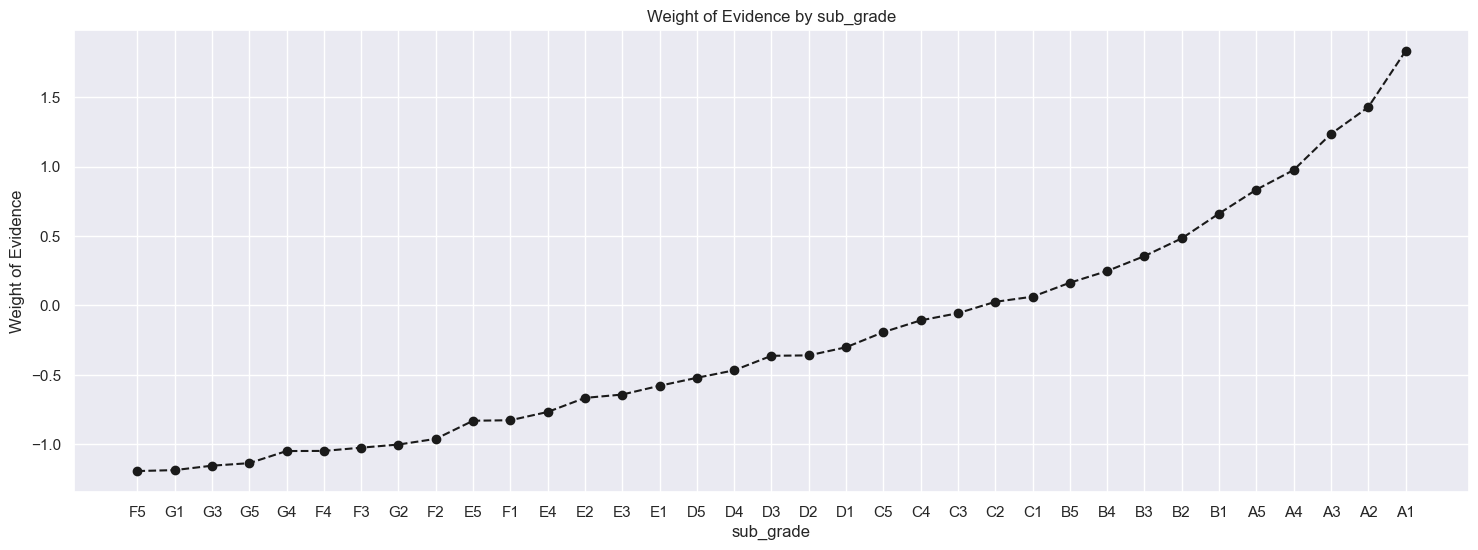

In [228]:
plot_by_woe(df_sub)

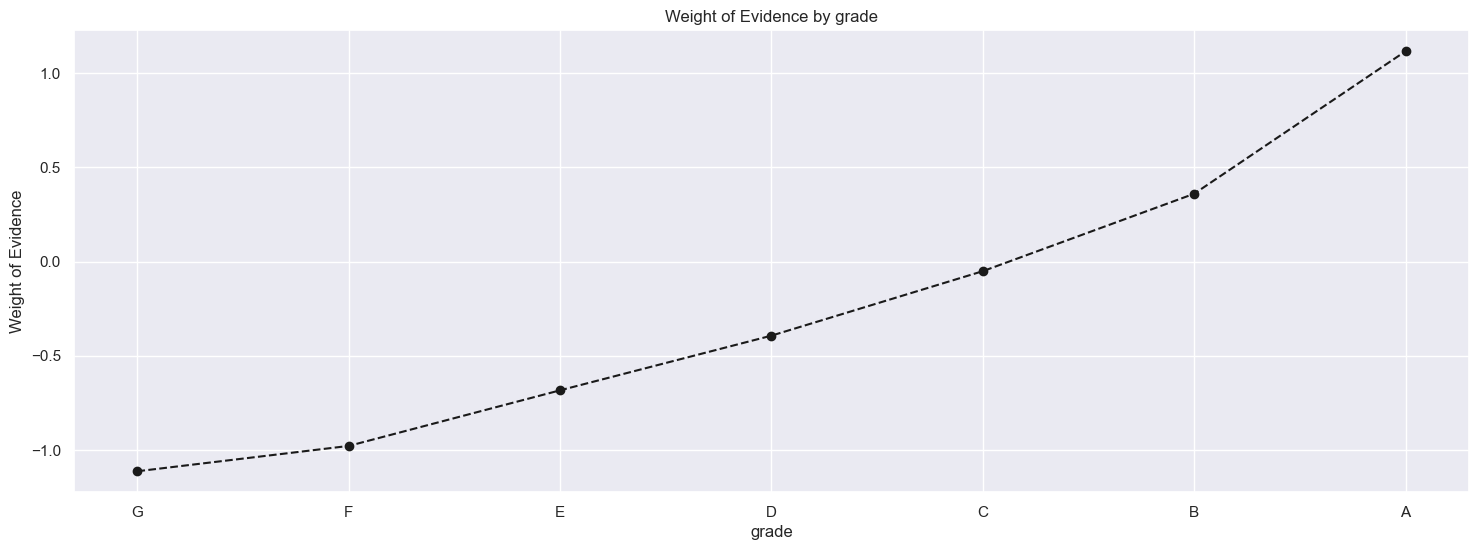

In [229]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

  home_ownership   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0          OTHER     137   0.795620    0.000367     109.0     28.0   
1           NONE      40   0.850000    0.000107      34.0      6.0   
2           RENT  150599   0.871294    0.403720  131216.0  19383.0   
3            OWN   33295   0.889593    0.089256   29619.0   3676.0   
4       MORTGAGE  188956   0.901215    0.506546  170290.0  18666.0   
5            ANY       1   1.000000    0.000003       1.0      0.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000329    0.000671 -0.711872             NaN       NaN  inf  
1     0.000103    0.000144 -0.336415        0.054380  0.375458  inf  
2     0.396101    0.464163 -0.158567        0.021294  0.177847  inf  
3     0.089411    0.088029  0.015575        0.018299  0.174142  inf  
4     0.514054    0.446993  0.139783        0.011622  0.124208  inf  
5     0.000003    0.000000       inf        0.098785       inf  inf  


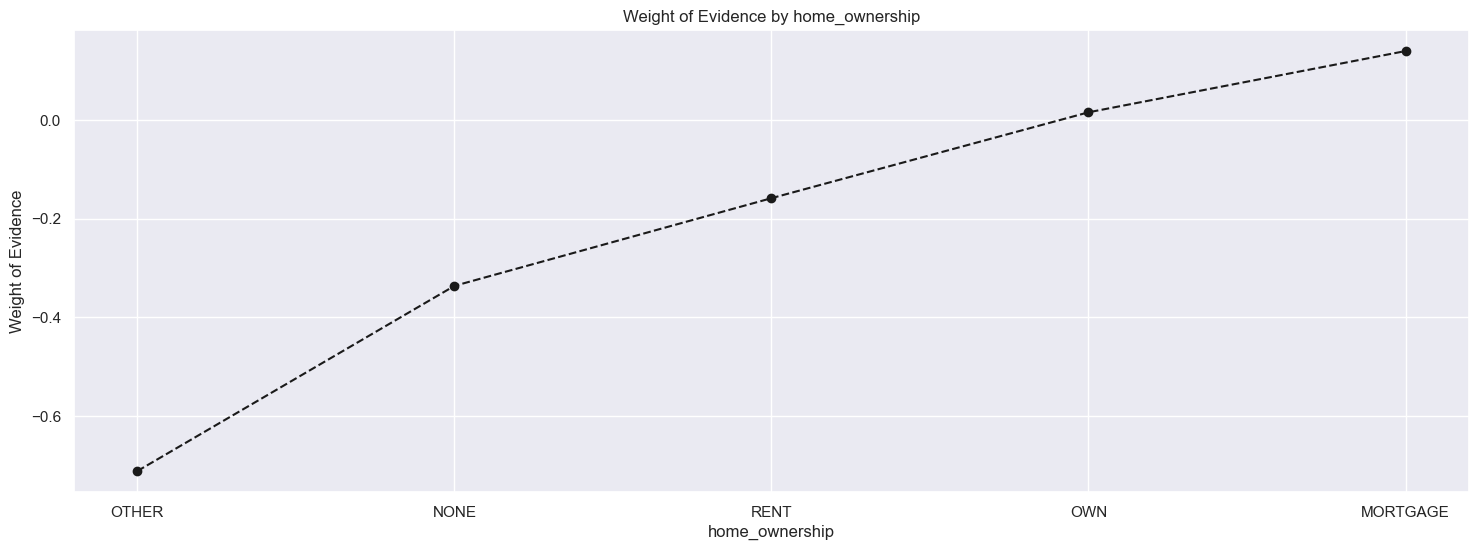

In [230]:
## Other, any and none category should be merged with Rent, as 3 don't have enough obs.
df_sub =woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
print(df_sub)
plot_by_woe(df_sub)

In [231]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [232]:
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [233]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE     13   0.461538    0.000035      6.0     7.0     0.000018   
1          IA     13   0.769231    0.000035     10.0     3.0     0.000030   
2          NV   5221   0.863436    0.013996   4508.0   713.0     0.013608   
3          FL  25211   0.873309    0.067585  22017.0  3194.0     0.066463   
4          AL   4671   0.874331    0.012522   4084.0   587.0     0.012328   
5          HI   2001   0.875562    0.005364   1752.0   249.0     0.005289   
6          VA  11366   0.880433    0.030470  10007.0  1359.0     0.030208   
7          NM   2075   0.880482    0.005563   1827.0   248.0     0.005515   
8          NY  32211   0.880848    0.086350  28373.0  3838.0     0.085649   
9          TN   4845   0.880908    0.012988   4268.0   577.0     0.012884   
10         MO   6017   0.881336    0.016130   5303.0   714.0     0.016008   
11         LA   4359   0.882083    0.011685   3845.0   514.0     0.011607   
12         OK   3284   0.882156    0.008804   2897.0   387.0     0.008745   
13         NC  10204   0.882399    0.027355   9004.0  1200.0     0.027180   
14         MD   8771   0.882910    0.023513   7744.0  1027.0     0.023377   
15         CA  57199   0.883320    0.153337  50525.0  6674.0     0.152520   
16         UT   2756   0.884615    0.007388   2438.0   318.0     0.007360   
17         NJ  14385   0.885436    0.038563  12737.0  1648.0     0.038449   
18         AZ   8645   0.886293    0.023175   7662.0   983.0     0.023129   
19         KY   3587   0.886535    0.009616   3180.0   407.0     0.009599   
20         PA  13090   0.886707    0.035091  11607.0  1483.0     0.035038   
21         MI   9191   0.887607    0.024639   8158.0  1033.0     0.024627   
22         AR   2760   0.888043    0.007399   2451.0   309.0     0.007399   
23         OH  12135   0.888669    0.032531  10784.0  1351.0     0.032554   
24         MN   6526   0.889366    0.017495   5804.0   722.0     0.017521   
25         DE   1064   0.890038    0.002852    947.0   117.0     0.002859   
26         RI   1647   0.890103    0.004415   1466.0   181.0     0.004425   
27         MA   8858   0.891059    0.023746   7893.0   965.0     0.023827   
28         IN   5210   0.891171    0.013967   4643.0   567.0     0.014016   
29         SD    801   0.891386    0.002147    714.0    87.0     0.002155   
30         WA   8372   0.893932    0.022443   7484.0   888.0     0.022592   
31         GA  11960   0.894064    0.032062  10693.0  1267.0     0.032279   
32         OR   4814   0.895721    0.012905   4312.0   502.0     0.013017   
33         MT   1103   0.897552    0.002957    990.0   113.0     0.002989   
34         WI   4740   0.897890    0.012707   4256.0   484.0     0.012848   
35         TX  29158   0.900953    0.078166  26270.0  2888.0     0.079301   
36         MS    980   0.903061    0.002627    885.0    95.0     0.002672   
37         CT   5775   0.903203    0.015481   5216.0   559.0     0.015746   
38         IL  14833   0.903324    0.039764  13399.0  1434.0     0.040447   
39         KS   3360   0.906548    0.009007   3046.0   314.0     0.009195   
40         CO   7823   0.906558    0.020972   7092.0   731.0     0.021409   
41         SC   4448   0.907374    0.011924   4036.0   412.0     0.012183   
42         VT    727   0.907840    0.001949    660.0    67.0     0.001992   
43         AK   1003   0.909272    0.002689    912.0    91.0     0.002753   
44         WV   1926   0.915369    0.005163   1763.0   163.0     0.005322   
45         NH   1830   0.920219    0.004906   1684.0   146.0     0.005083   
46         WY    919   0.924918    0.002464    850.0    69.0     0.002566   
47         DC   1129   0.934455    0.003027   1055.0    74.0     0.003185   
48         ME      2   1.000000    0.000005      2.0     0.0     0.000006   
49         ID     10   1.000000    0.000027     10.0     0.0     0.000030   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000168 -2

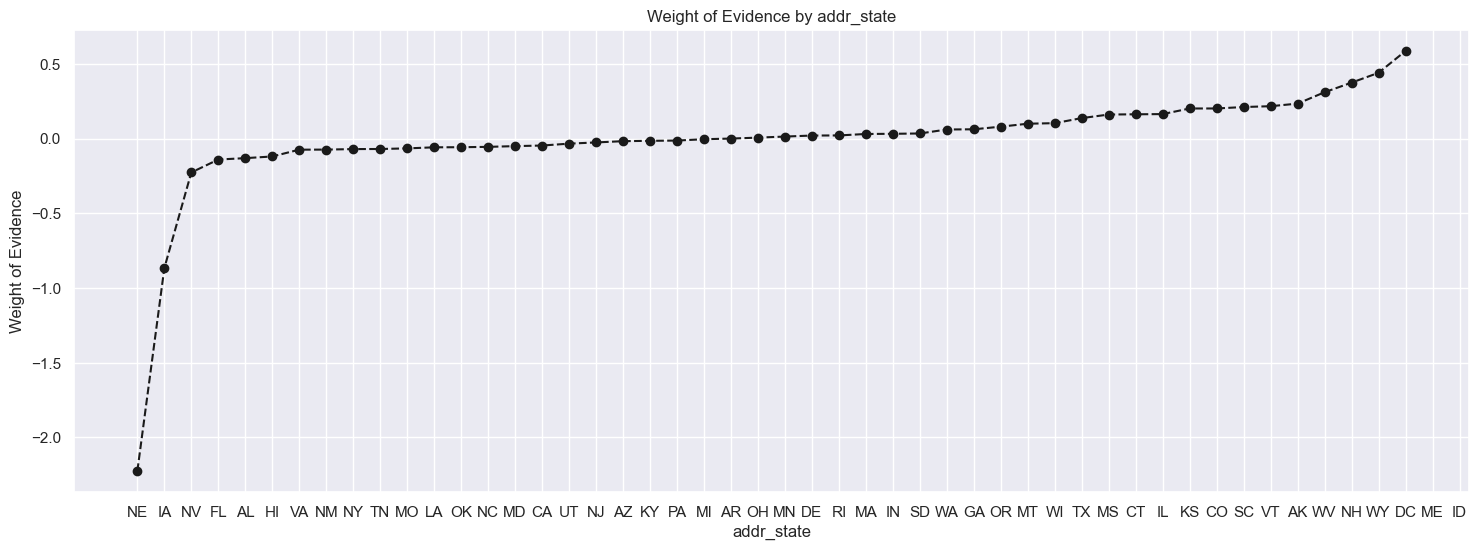

In [234]:
plot_by_woe(df_temp)

In [235]:
## if we have ND in test dataset when we mark it as zero as we dont have it in our train dataset
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

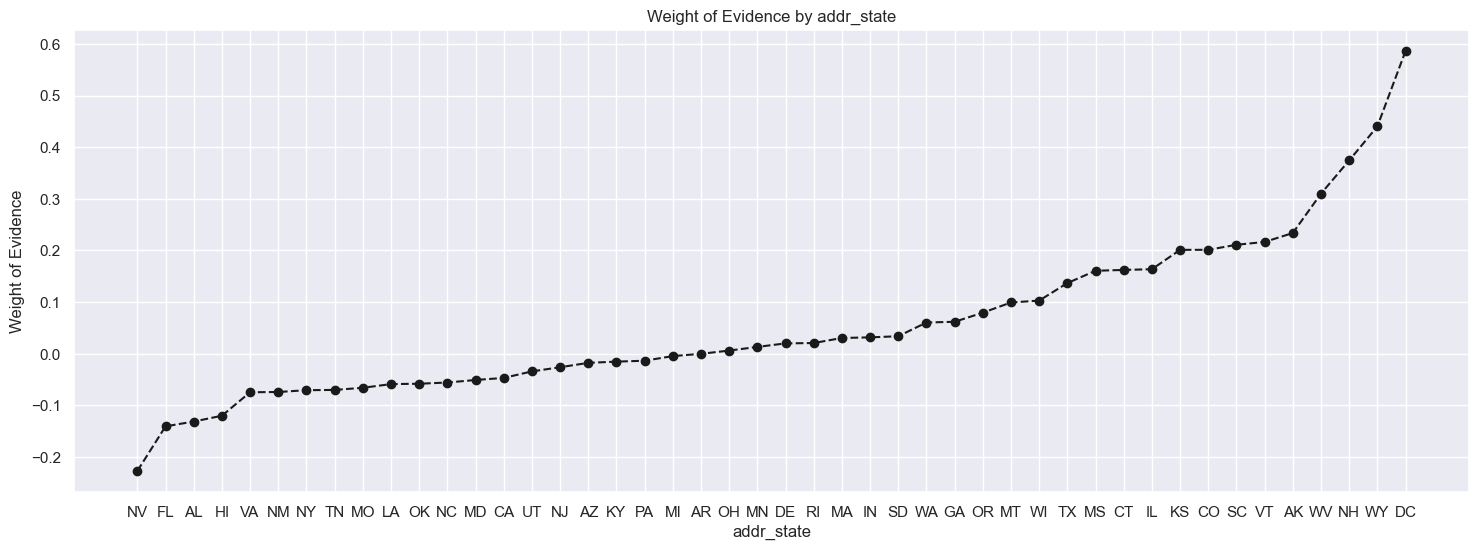

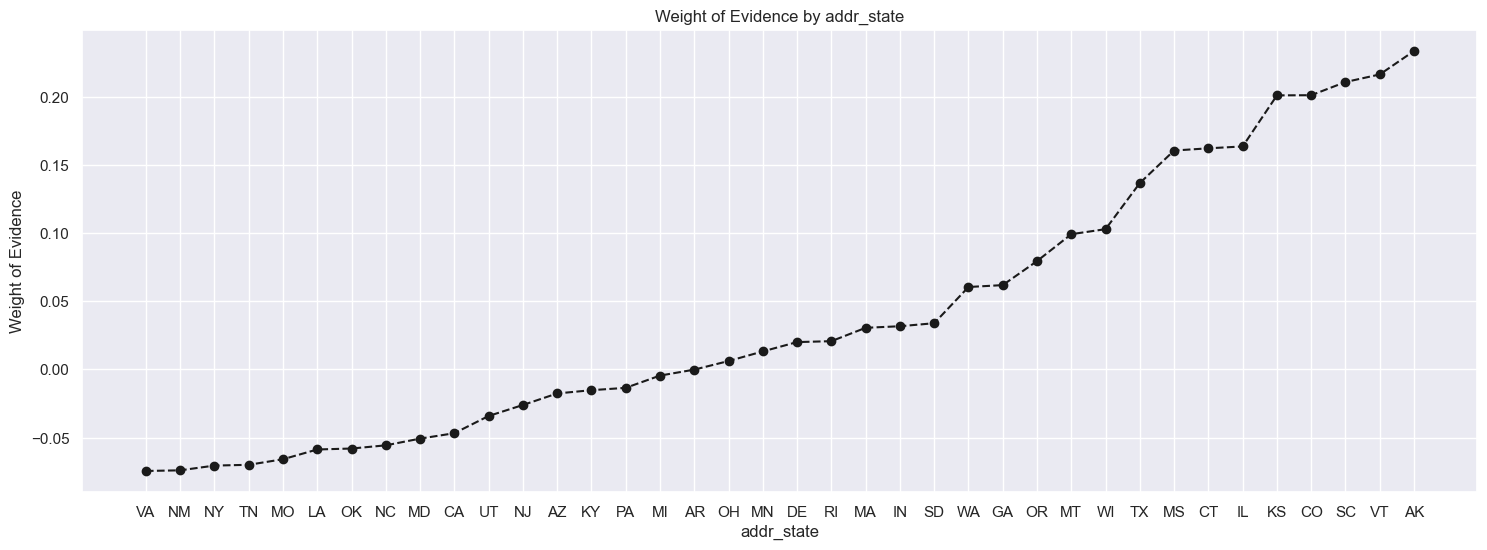

In [236]:
plot_by_woe(df_temp.iloc[2: -2, :]) ## removing NA and IA because of low obs
plot_by_woe(df_temp.iloc[6: -6, :]) ## removing ME and ID as we have no bad borrowers

In [237]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

['Source Verified' 'Not Verified' 'Verified']
  verification_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0            Verified  134414   0.869761    0.360332  116908.0  17506.0   
1     Source Verified  120030   0.892768    0.321772  107159.0  12871.0   
2        Not Verified  118584   0.904017    0.317896  107202.0  11382.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.35291    0.419215 -0.172172             NaN       NaN  0.020916  
1      0.32348    0.308221  0.048321        0.023008  0.220493  0.020916  
2      0.32361    0.272564  0.171666        0.011249  0.123345  0.020916  


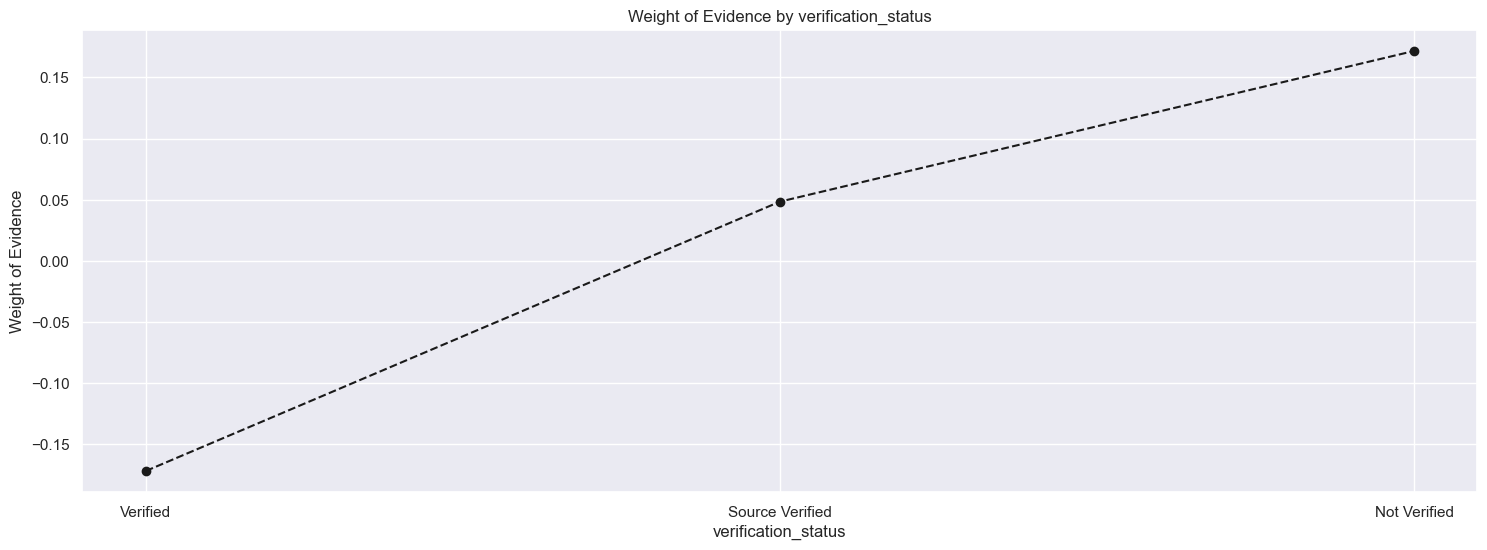

In [238]:
## verification status
print(df_inputs_prepr['verification_status'].unique())
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
print(df_temp)
plot_by_woe(df_temp)

['debt_consolidation' 'educational' 'other' 'home_improvement'
 'credit_card' 'major_purchase' 'wedding' 'small_business' 'vacation'
 'house' 'car' 'moving' 'renewable_energy' 'medical']
               purpose   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0       small_business    5582   0.780903    0.014964    4359.0   1223.0   
1          educational     333   0.801802    0.000893     267.0     66.0   
2               moving    2392   0.837375    0.006412    2003.0    389.0   
3                house    1830   0.857923    0.004906    1570.0    260.0   
4                other   18884   0.859246    0.050624   16226.0   2658.0   
5     renewable_energy     281   0.864769    0.000753     243.0     38.0   
6              medical    3684   0.866721    0.009876    3193.0    491.0   
7             vacation    1991   0.877951    0.005337    1748.0    243.0   
8              wedding    1887   0.881823    0.005059    1664.0    223.0   
9   debt_consolidation  219183   0.884092    0.587578

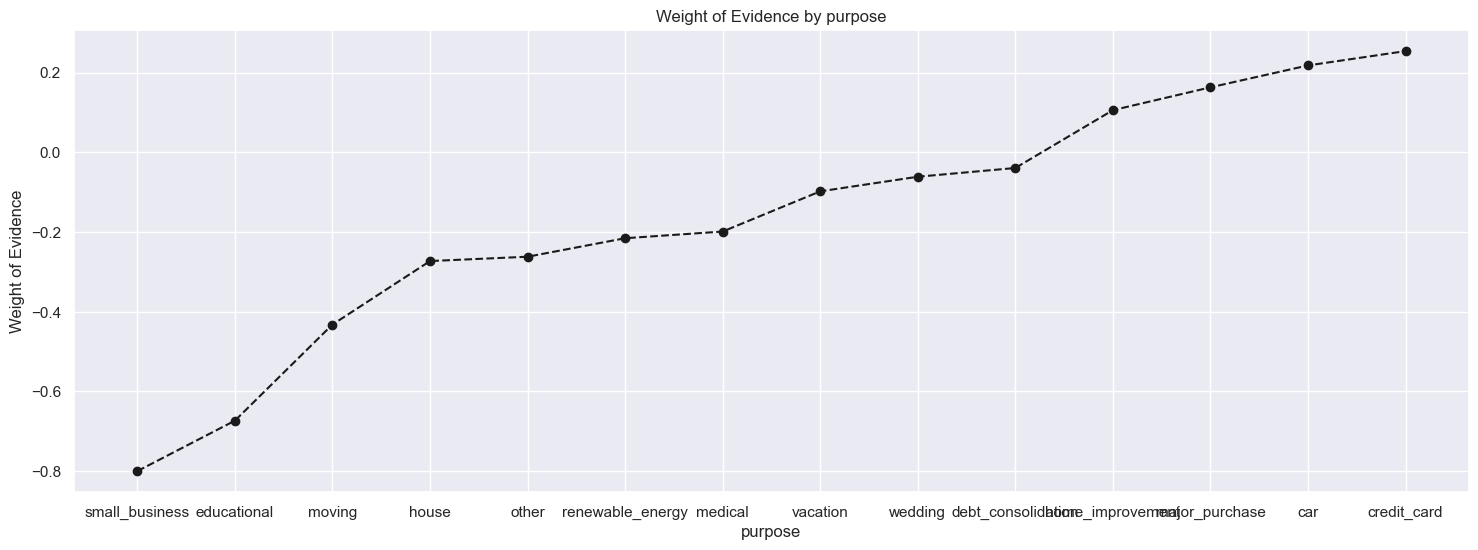

In [239]:
## purpose
print(df_inputs_prepr['purpose'].unique())
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
print(df_temp)
plot_by_woe(df_temp)

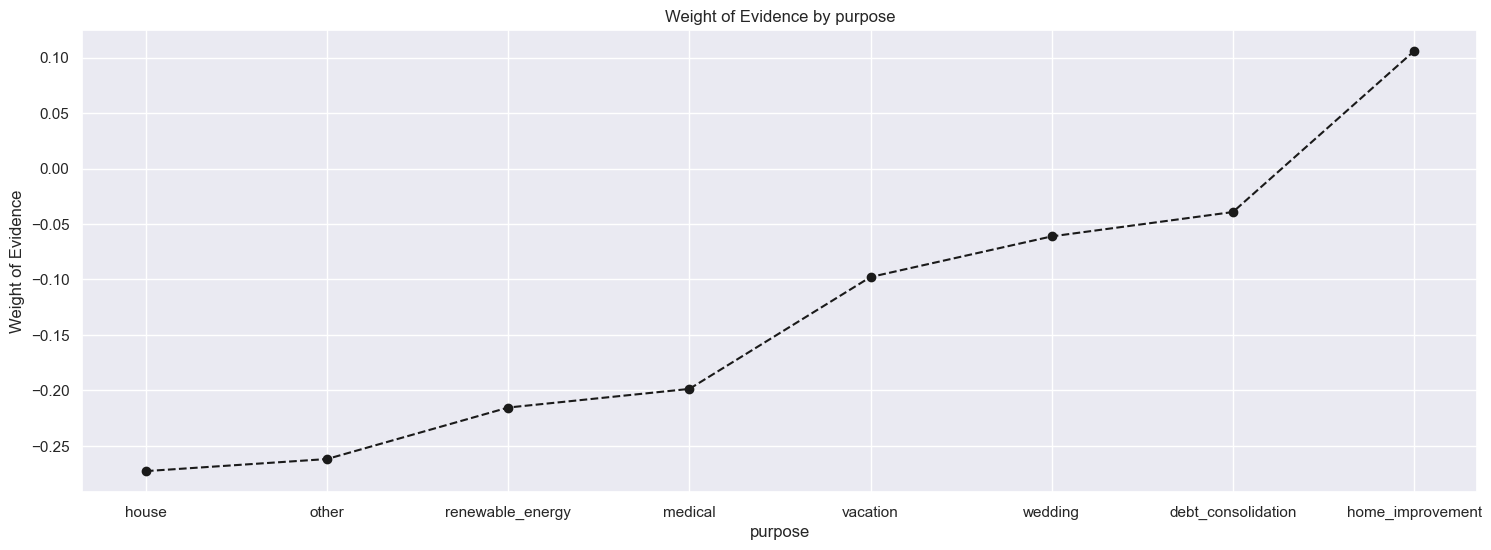

In [240]:
plot_by_woe(df_temp.iloc[3: -3, :])

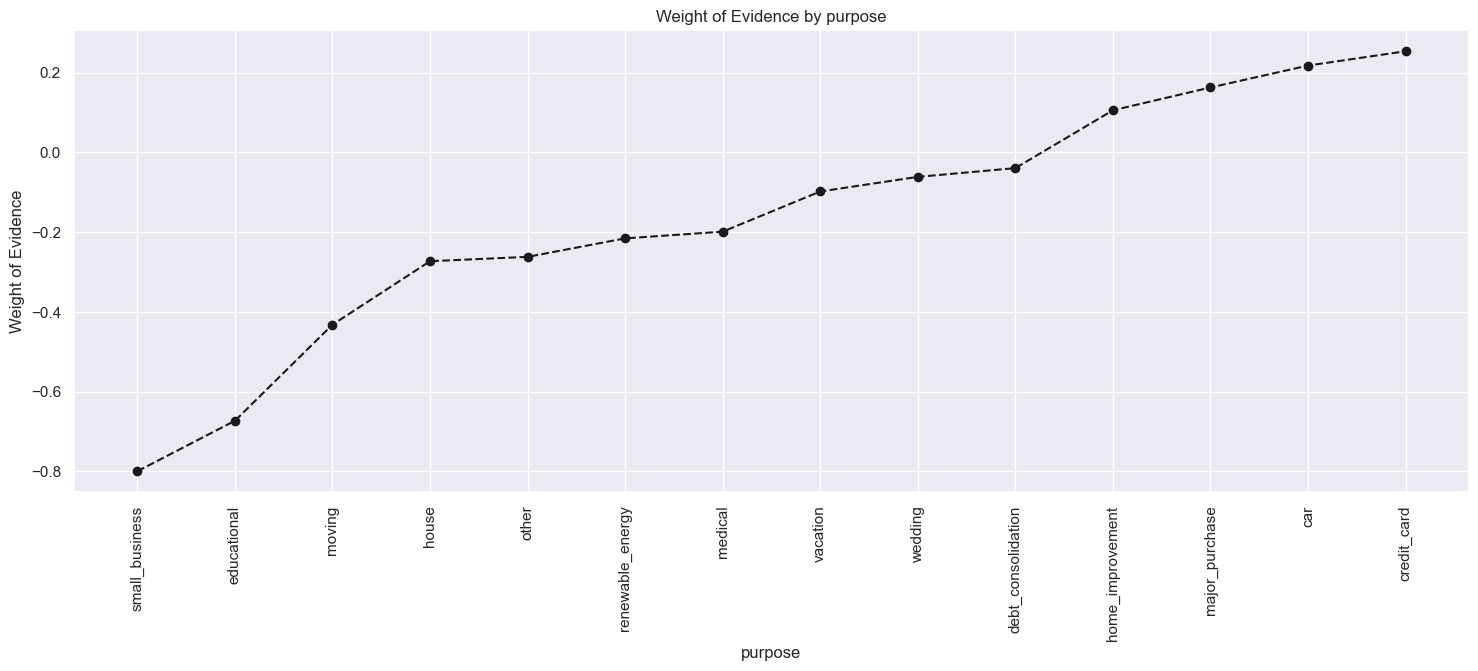

In [241]:
plot_by_woe(df_temp, 90)

In [242]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

['f' 'w']
  initial_list_status   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0                   f  242514   0.877459    0.650123  212796.0  29718.0   
1                   w  130514   0.907742    0.349877  118473.0  12041.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.642366    0.711655 -0.102435             NaN       NaN  0.022019  
1     0.357634    0.288345  0.215352        0.030283  0.317787  0.022019  


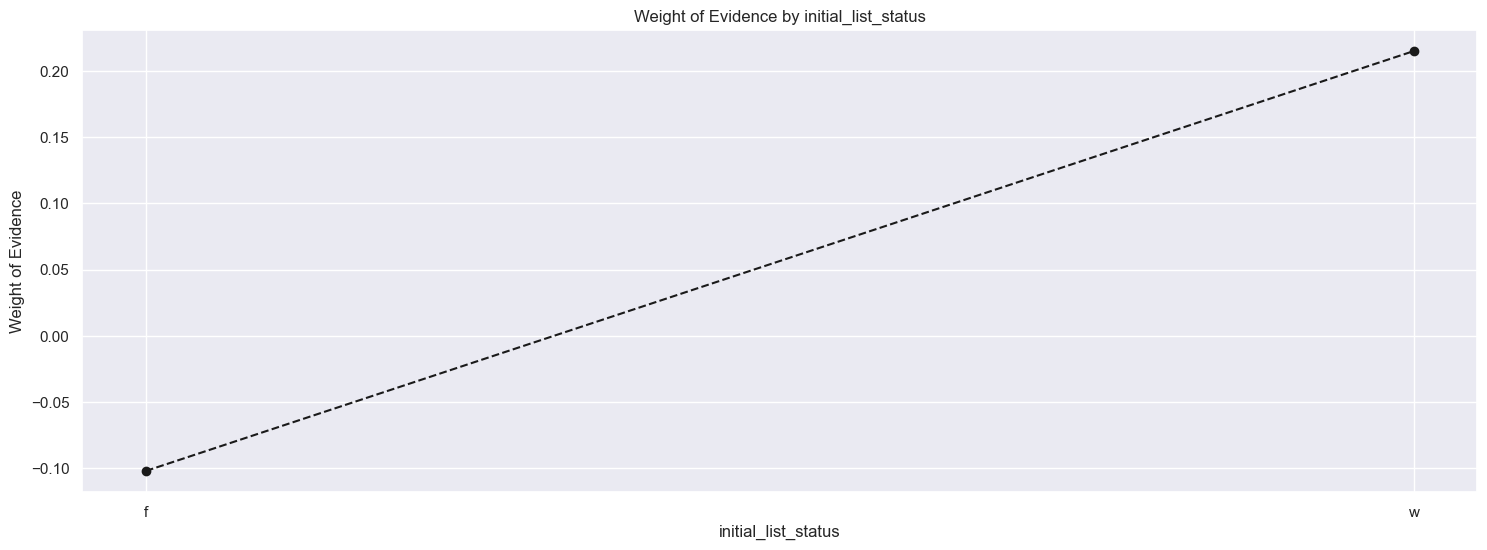

In [243]:
## initial list status
print(df_inputs_prepr['initial_list_status'].unique())
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
print(df_temp)
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [244]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

[36 60]
   term_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0        36  270419   0.900706    0.724929  243568.0  26851.0     0.735257   
1        60  102609   0.854711    0.275071   87701.0  14908.0     0.264743   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.642999  0.134077             NaN       NaN  0.039953  
1    0.357001 -0.298980        0.045995  0.433058  0.039953  


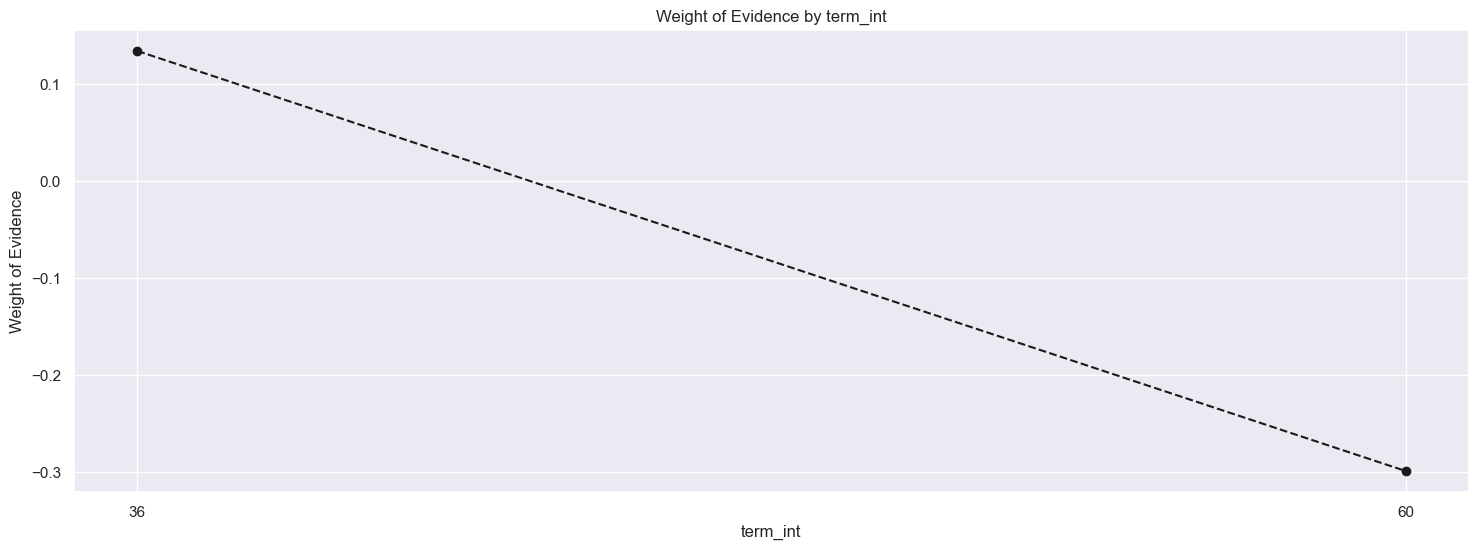

In [245]:
## term int
print(df_inputs_prepr['term_int'].unique())
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
print(df_temp)
plot_by_woe(df_temp)

In [246]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

[ 3.  6. 10.  7.  5.  0.  2.  9.  1.  8.  4.]
    emp_length_int   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0   45720   0.873250    0.122565   39925.0   5795.0   
1              1.0   23654   0.884417    0.063411   20920.0   2734.0   
2              2.0   33078   0.888204    0.088674   29380.0   3698.0   
3              3.0   29205   0.888067    0.078292   25936.0   3269.0   
4              4.0   22468   0.887662    0.060231   19944.0   2524.0   
5              5.0   24602   0.882408    0.065952   21709.0   2893.0   
6              6.0   20887   0.881697    0.055993   18416.0   2471.0   
7              7.0   21049   0.885268    0.056427   18634.0   2415.0   
8              8.0   17853   0.887918    0.047860   15852.0   2001.0   
9              9.0   14267   0.883017    0.038246   12598.0   1669.0   
10            10.0  120245   0.897792    0.322348  107955.0  12290.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.1205

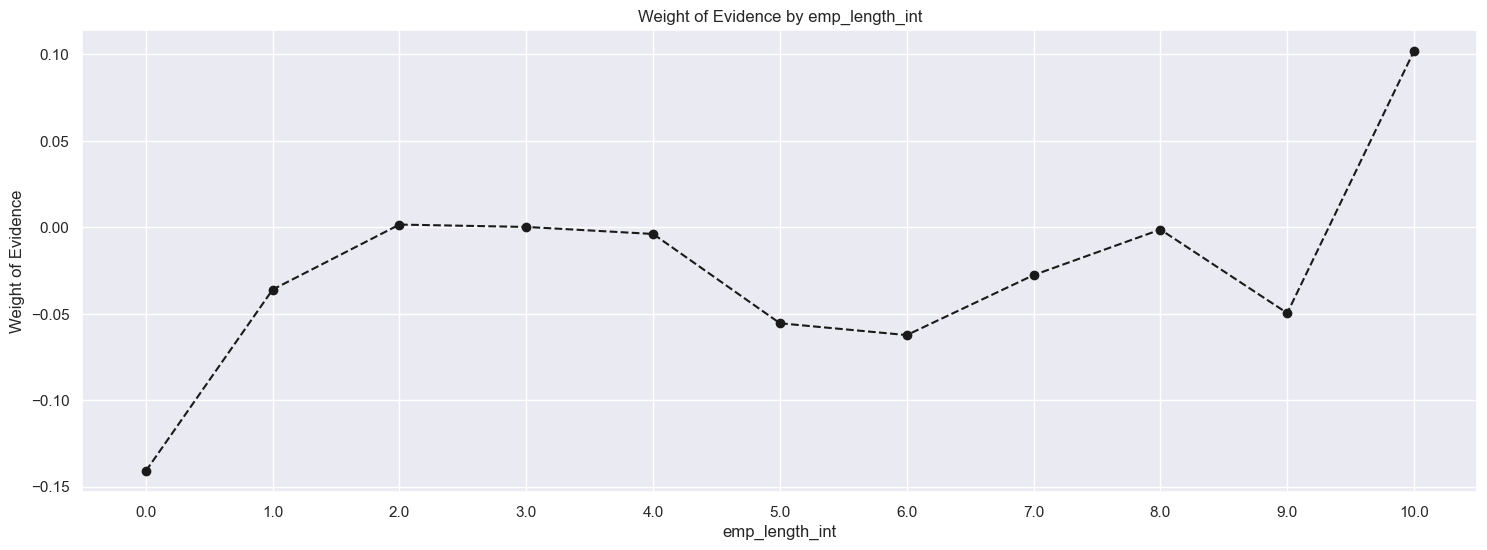

In [247]:
## emp length int
print(df_inputs_prepr['emp_length_int'].unique())
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
print(df_temp)
plot_by_woe(df_temp)

In [248]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [249]:
print(df_inputs_prepr['mths_since_issue_d'].unique())
## fine classing
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50) ## 50 categories we want to cut it into
print(df_inputs_prepr['mths_since_issue_d_factor'])


[ 46.  65.  55.  45. 102.  38.  92.  54.  43.  58.  59.  44.  41.  52.
  60. 115.  51.  63.  50.  48.  49.  42.  39.  67.  70.  88.  47.  77.
  64.  40.  62.  90.  66.  57.  80.  69.  53.  61.  74.  75.  71.  89.
  82.  83.  56. 105.  84.  73.  86.  37.  72.  93.  78.  68.  85.  87.
  91. 118.  94.  96.  79.  76.  81.  97.  95.  99. 106. 127. 107. 120.
 112. 121. 116.  98. 104. 108. 101. 124. 123. 110. 119. 122. 126. 100.
 117. 114. 111. 125. 109. 128. 113.]


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [250]:
## mths since issued
print(df_inputs_prepr['mths_since_issue_d_factor'].unique())
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
print(df_temp)


[(44.28, 46.1], (64.3, 66.12], (53.38, 55.2], (100.7, 102.52], (36.909, 38.82], ..., (102.52, 104.34], (107.98, 109.8], (122.54, 124.36], (109.8, 111.62], (124.36, 126.18]]
Length: 50
Categories (50, interval[float64, right]): [(36.909, 38.82] < (38.82, 40.64] < (40.64, 42.46] < (42.46, 44.28] ... (120.72, 122.54] < (122.54, 124.36] < (124.36, 126.18] < (126.18, 128.0]]
   mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            (36.909, 38.82]  28170   0.938942    0.075517  26450.0  1720.0   
1             (38.82, 40.64]  39636   0.923958    0.106255  36622.0  3014.0   
2             (40.64, 42.46]  38614   0.913477    0.103515  35273.0  3341.0   
3             (42.46, 44.28]  29038   0.904573    0.077844  26267.0  2771.0   
4              (44.28, 46.1]  28367   0.898720    0.076045  25494.0  2873.0   
5              (46.1, 47.92]  12165   0.896178    0.032611  10902.0  1263.0   
6             (47.92, 49.74]  24451   0.895914    0.065547  21906.0  2545.

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


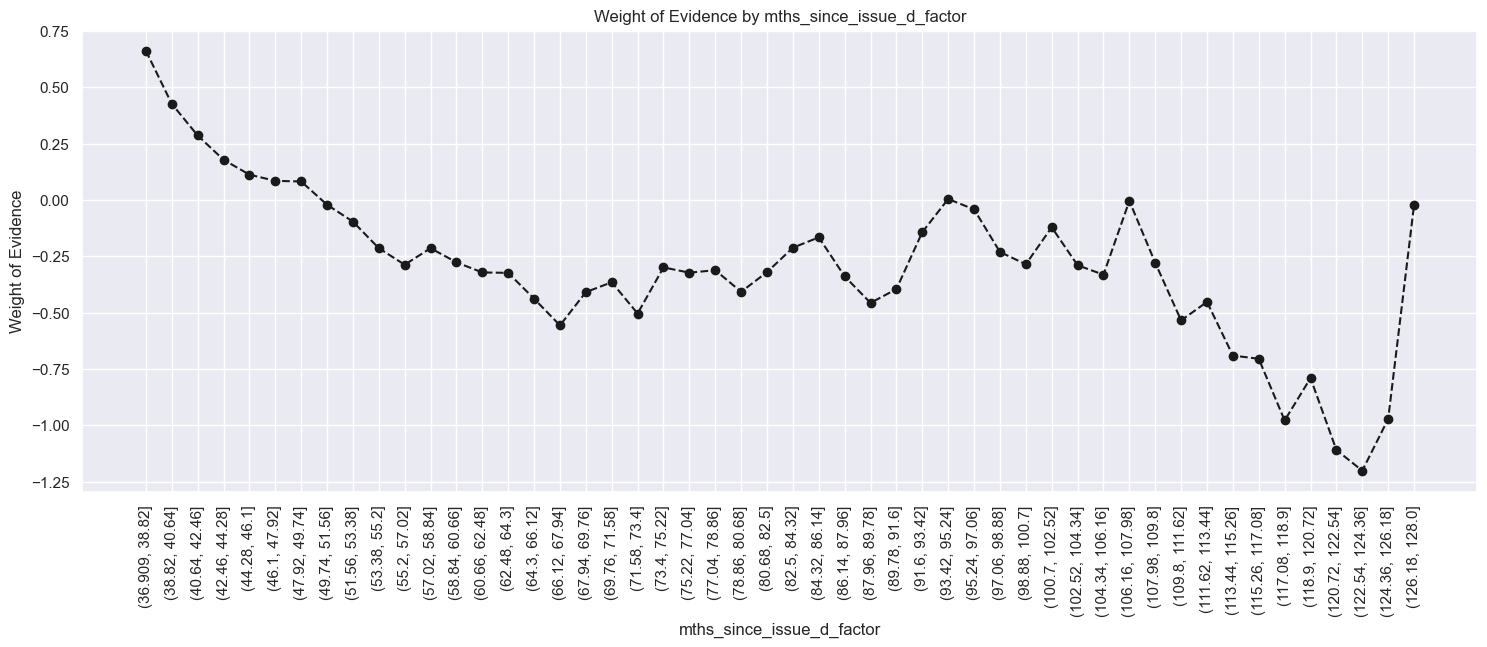

In [251]:
plot_by_woe(df_temp,90)

In [252]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [253]:
## interest rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)


C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


In [254]:
plot_by_woe(df_temp, 90)
df_temp
## greater the interest rate lower the WoE and higher the PD

int_rate_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (5.399, 5.833]    785   0.961783    0.002104    755.0    30.0   
1     (5.833, 6.246]   8459   0.979667    0.022677   8287.0   172.0   
2     (6.246, 6.658]   7826   0.970994    0.020980   7599.0   227.0   
3     (6.658, 7.071]   1816   0.973018    0.004868   1767.0    49.0   
4     (7.071, 7.484]   3143   0.976137    0.008426   3068.0    75.0   
5     (7.484, 7.897]  12581   0.961688    0.033727  12099.0   482.0   
6      (7.897, 8.31]   9687   0.949210    0.025969   9195.0   492.0   
7      (8.31, 8.722]   6594   0.963907    0.017677   6356.0   238.0   
8     (8.722, 9.135]   9539   0.936052    0.025572   8929.0   610.0   
9     (9.135, 9.548]   6681   0.962131    0.017910   6428.0   253.0   
10    (9.548, 9.961]   7588   0.931339    0.020342   7067.0   521.0   
11   (9.961, 10.374]  10941   0.931725    0.029330  10194.0   747.0   
12  (10.374, 10.786]   5857   0.912412    0.015701   5344.0   513.0   
13  (10.786, 11.199]  17851   0.927399    0.047854  16555.0  1296.0   
14  (11.199, 11.612]   4876   0.916325    0.013071   4468.0   408.0   
15  (11.612, 12.025]  15597   0.930692    0.041812  14516.0  1081.0   
16  (12.025, 12.438]  12336   0.890807    0.033070  10989.0  1347.0   
17   (12.438, 12.85]  11065   0.920831    0.029663  10189.0   876.0   
18   (12.85, 13.263]  21329   0.901027    0.057178  19218.0  2111.0   
19  (13.263, 13.676]  15392   0.904821    0.041262  13927.0  1465.0   
20  (13.676, 14.089]  10991   0.893549    0.029464   9821.0  1170.0   
21  (14.089, 14.502]  23436   0.884579    0.062826  20731.0  2705.0   
22  (14.502, 14.914]   4333   0.861528    0.011616   3733.0   600.0   
23  (14.914, 15.327]  18932   0.878882    0.050752  16639.0  2293.0   
24   (15.327, 15.74]  12327   0.883264    0.033046  10888.0  1439.0   
25   (15.74, 16.153]   7477   0.836967    0.020044   6258.0  1219.0   
26  (16.153, 16.566]  12991   0.856670    0.034826  11129.0  1862.0   
27  (16.566, 16.978]   4237   0.841397    0.011358   3565.0   672.0   
28  (16.978, 17.391]  11396   0.850035    0.030550   9687.0  1709.0   
29  (17.391, 17.804]  12288   0.835856    0.032941  10271.0  2017.0   
30  (17.804, 18.217]   1306   0.816998    0.003501   1067.0   239.0   
31   (18.217, 18.63]  11036   0.831189    0.029585   9173.0  1863.0   
32   (18.63, 19.042]   6808   0.814630    0.018251   5546.0  1262.0   
33  (19.042, 19.455]   4425   0.800452    0.011862   3542.0   883.0   
34  (19.455, 19.868]   6763   0.819607    0.018130   5543.0  1220.0   
35  (19.868, 20.281]   4899   0.826903    0.013133   4051.0   848.0   
36  (20.281, 20.694]   3221   0.790438    0.008635   2546.0   675.0   
37  (20.694, 21.106]   4016   0.793576    0.010766   3187.0   829.0   
38  (21.106, 21.519]   2729   0.775376    0.007316   2116.0   613.0   
39  (21.519, 21.932]    989   0.758342    0.002651    750.0   239.0   
40  (21.932, 22.345]   3476   0.789125    0.009318   2743.0   733.0   
41  (22.345, 22.758]   2251   0.757885    0.006034   1706.0   545.0   
42   (22.758, 23.17]   1535   0.756352    0.004115   1161.0   374.0   
43   (23.17, 23.583]   2652   0.774510    0.007109   2054.0   598.0   
44  (23.583, 23.996]   1573   0.720915    0.004217   1134.0   439.0   
45  (23.996, 24.409]   1455   0.760825    0.003901   1107.0   348.0   
46  (24.409, 24.822]   1664   0.755409    0.004461   1257.0   407.0   
47  (24.822, 25.234]   1315   0.766540    0.003525   1008.0   307.0   
48  (25.234, 25.647]    778   0.733933    0.002086    571.0   207.0   
49   (25.647, 26.06]   1786   0.747480    0.004788   1335.0   451.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002279    0.000718  1.154505             NaN       NaN  0.344154  
1      0.025016    0.004119  1.803933        0.017883  0.649428  0.344154  
2      0.022939    0.005436  1.439806        0.008673  0.364127  0.344154  
3      0.005334    0.001173  1.514202        0.002023  0.074396  0.344154  
4  

In [255]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

[24000 10000 20425 ... 34650 32775   950]
[(23960.0, 24650.0], (9470.0, 10160.0], (19820.0, 20510.0], (17060.0, 17750.0], (8090.0, 8780.0], ..., (23270.0, 23960.0], (31550.0, 32240.0], (28790.0, 29480.0], (28100.0, 28790.0], (33620.0, 34310.0]]
Length: 50
Categories (50, interval[float64, right]): [(465.5, 1190.0] < (1190.0, 1880.0] < (1880.0, 2570.0] < (2570.0, 3260.0] ... (32240.0, 32930.0] < (32930.0, 33620.0] < (33620.0, 34310.0] < (34310.0, 35000.0]]
    funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (465.5, 1190.0]   1224   0.904412    0.003281   1107.0   117.0   
1     (1190.0, 1880.0]   3028   0.903236    0.008117   2735.0   293.0   
2     (1880.0, 2570.0]   6018   0.891825    0.016133   5367.0   651.0   
3     (2570.0, 3260.0]   7248   0.886451    0.019430   6425.0   823.0   
4     (3260.0, 3950.0]   4751   0.889286    0.012736   4225.0   526.0   
5     (3950.0, 4640.0]   9023   0.888175    0.024189   8014.0  1009.0   
6     (4640.0, 5330.0]  15903

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


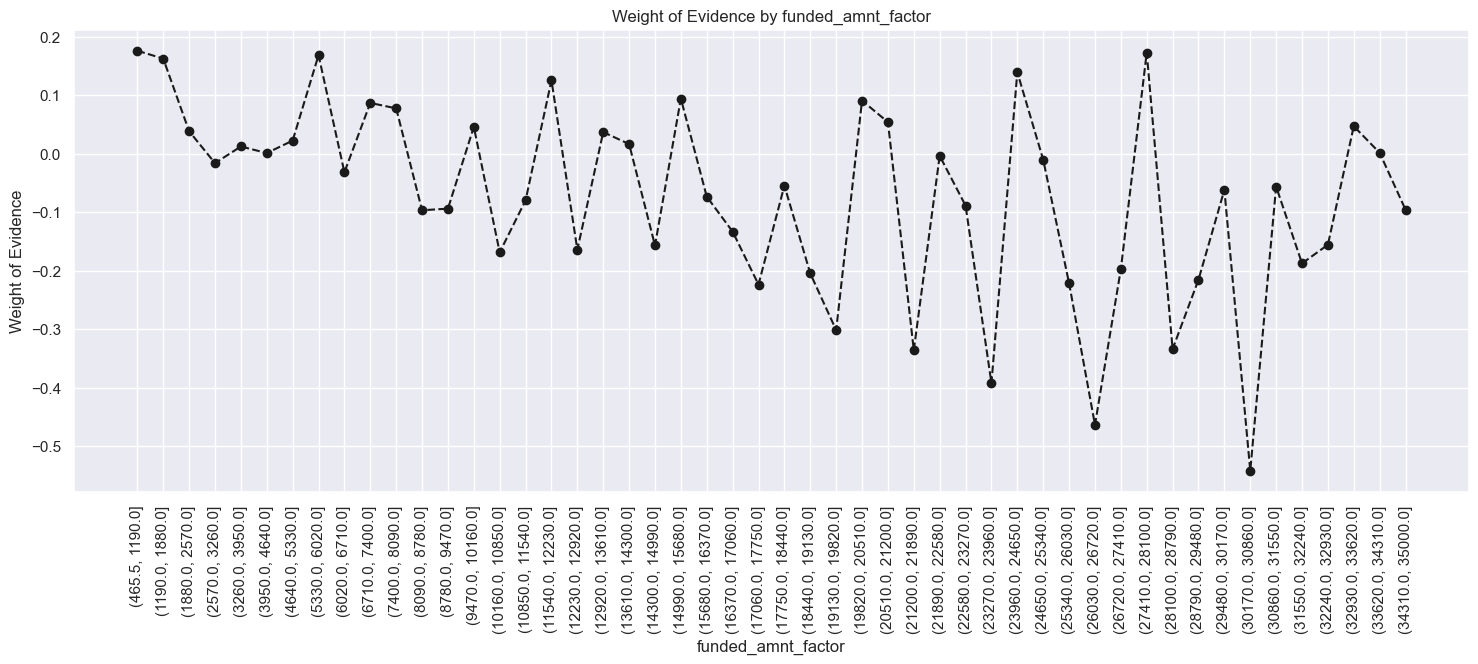

In [256]:
## funded_amnt_factor
print(df_inputs_prepr['funded_amnt'].unique())
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
print(df_inputs_prepr['funded_amnt_factor'].unique())
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
print(df_temp)
plot_by_woe(df_temp,90)
## no clear pattern of dependence, all the variation is around the horizontal line. So we can leave funded amount from our PD model

In [257]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                     (-0.596, 11.92]     24   0.875000    0.000064     21.0   
1                      (11.92, 23.84]      0        NaN    0.000000      NaN   
2                      (23.84, 35.76]      0        NaN    0.000000      NaN   
3                      (35.76, 47.68]      0        NaN    0.000000      NaN   
4                       (47.68, 59.6]      0        NaN    0.000000      NaN   
5                       (59.6, 71.52]      0        NaN    0.000000      NaN   
6                      (71.52, 83.44]    722   0.898892    0.001936    649.0   
7                      (83.44, 95.36]   2079   0.878788    0.005573   1827.0   
8                     (95.36, 107.28]   2667   0.851519    0.007150   2271.0   
9                     (107.28, 119.2]   5092   0.868028    0.013650   4420.0   
10                    (119.2, 131.12]   9217   0.860909    0.024709   7935.0   
11                   (131.12, 143.04]  12704   0.863901    0.034056  10975.0   
12                   (143.04, 154.96]  12565   0.871946    0.033684  10956.0   
13                   (154.96, 166.88]  16266   0.875630    0.043605  14243.0   
14                    (166.88, 178.8]  17912   0.881811    0.048018  15795.0   
15                    (178.8, 190.72]  21913   0.883813    0.058744  19367.0   
16                   (190.72, 202.64]  26096   0.882396    0.069957  23027.0   
17                   (202.64, 214.56]  28421   0.882341    0.076190  25077.0   
18                   (214.56, 226.48]  27027   0.884079    0.072453  23894.0   
19                    (226.48, 238.4]  23496   0.885257    0.062987  20800.0   
20                    (238.4, 250.32]  18087   0.887433    0.048487  16051.0   
21                   (250.32, 262.24]  18090   0.892040    0.048495  16137.0   
22                   (262.24, 274.16]  17958   0.892137    0.048141  16021.0   
23                   (274.16, 286.08]  16116   0.900410    0.043203  14511.0   
24                    (286.08, 298.0]  13919   0.897981    0.037314  12499.0   
25                    (298.0, 309.92]   9291   0.905392    0.024907   8412.0   
26                   (309.92, 321.84]   7616   0.902311    0.020417   6872.0   
27                   (321.84, 333.76]   8603   0.899337    0.023063   7737.0   
28                   (333.76, 345.68]   8307   0.905622    0.022269   7523.0   
29                    (345.68, 357.6]   7243   0.899351    0.019417   6514.0   
30                    (357.6, 369.52]   5994   0.908408    0.016068   5445.0   
31                   (369.52, 381.44]   4984   0.907504    0.013361   4523.0   
32                   (381.44, 393.36]   4640   0.908621    0.012439   4216.0   
33                   (393.36, 405.28]   4203   0.906020    0.011267   3808.0   
34                    (405.28, 417.2]   3780   0.901587    0.010133   3408.0   
35                    (417.2, 429.12]   2998   0.909606    0.008037   2727.0   
36                   (429.12, 441.04]   2251   0.908485    0.006034   2045.0   
37                   (441.04, 452.96]   1604   0.922070    0.004300   1479.0   
38                   (452.96, 464.88]   1481   0.906144    0.003970   1342.0   
39                    (464.88, 476.8]   1612   0.910050    0.004321   1467.0   
40                    (476.8, 488.72]   1582   0.912137    0.004241   1443.0   
41                   (488.72, 500.64]   1248   0.903846    0.003346   1128.0   
42                   (500.64, 512.56]    913   0.910186    0.002448    831.0   
43                   (512.56, 524.48]    698   0.918338    0.001871    641.0   
44                    (524.48, 536.4]    642   0.898754    0.001721    577.0   
45                    (536.4, 548.32]    580   0.912069    0.001555    529.0   
46                   (548.32, 560.24]    510   0.913725    0.001367    466.0   
47                   (560.24, 572.16]    326   0.886503    0.000874    289.0   
48                   (572.16, 584.08]    351   0.905983    0.000941    318.0   
49 

In [258]:
plot_by_woe(df_temp, 90)

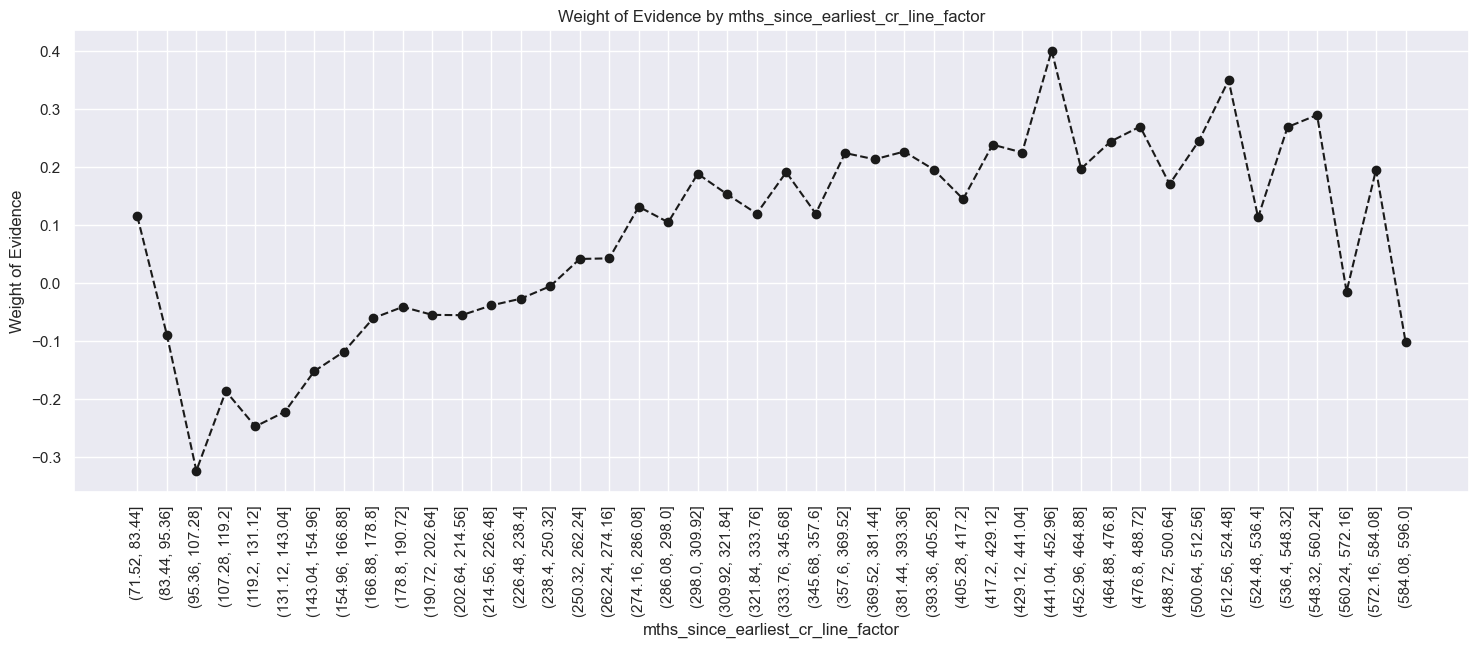

In [259]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [260]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [261]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  306417   0.888097    0.821432  272128.0  34289.0   
1           1.0   44927   0.889955    0.120439   39983.0   4944.0   
2           2.0   13118   0.884662    0.035166   11605.0   1513.0   
3           3.0    4550   0.879341    0.012197    4001.0    549.0   
4           4.0    1868   0.893469    0.005008    1669.0    199.0   
5           5.0     966   0.875776    0.002590     846.0    120.0   
6           6.0     501   0.898204    0.001343     450.0     51.0   
7           7.0     279   0.856631    0.000748     239.0     40.0   
8           8.0     148   0.891892    0.000397     132.0     16.0   
9           9.0      89   0.876404    0.000239      78.0     11.0   
10         10.0      56   0.857143    0.000150      48.0      8.0   
11         11.0      31   0.903226    0.000083      28.0      3.0   
12         12.0      30   0.733333    0.000080      22.0      8.0   
13         13.0      18   0.833333    0.000048      15.0      3.0   
14         14.0       6   0.833333    0.000016       5.0      1.0   
15         15.0       6   0.833333    0.000016       5.0      1.0   
16         16.0       4   1.000000    0.000011       4.0      0.0   
17         17.0       3   0.666667    0.000008       2.0      1.0   
18         18.0       3   0.666667    0.000008       2.0      1.0   
19         19.0       2   1.000000    0.000005       2.0      0.0   
20         21.0       2   0.500000    0.000005       1.0      1.0   
21         22.0       2   1.000000    0.000005       2.0      0.0   
22         24.0       1   1.000000    0.000003       1.0      0.0   
23         29.0       1   1.000000    0.000003       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good      diff_WoE   IV  
0      0.821471    0.821116  0.000432             NaN           NaN  inf  
1      0.120696    0.118394  0.019264        0.001858  1.883170e-02  inf  
2      0.035032    0.036232 -0.033674        0.005293  5.293804e-02  inf  
3      0.012078    0.013147 -0.084815        0.005322  5.114044e-02  inf  
4      0.005038    0.004765  0.055659        0.014128  1.404739e-01  inf  
5      0.002554    0.002874 -0.117988        0.017693  1.736475e-01  inf  
6      0.001358    0.001221  0.106406        0.022427  2.243943e-01  inf  
7      0.000721    0.000958 -0.283432        0.041573  3.898379e-01  inf  
8      0.000398    0.000383  0.039197        0.035261  3.226291e-01  inf  
9      0.000235    0.000263 -0.112202        0.015487  1.513996e-01  inf  
10     0.000145    0.000192 -0.279256        0.019262  1.670541e-01  inf  
11     0.000085    0.000072  0.162576        0.046083  4.418328e-01  inf  
12     0.000066    0.000192 -1.059415        0.169892  1.221991e+00  inf  
13     0.000045    0.000072 -0.461578        0.100000  5.978370e-01  inf  
14     0.000015    0.000024 -0.461578        0.000000  2.220446e-16  inf  
15     0.000015    0.000024 -0.461578        0.000000  0.000000e+00  inf  
16     0.000012    0.000000       inf        0.166667           inf  inf  
17     0.000006    0.000024 -1.377869        0.333333           inf  inf  
18     0.000006    0.000024 -1.377869        0.000000  0.000000e+00  inf  
19     0.000006    0.000000       inf        0.333333           inf  inf  
20     0.000003    0.000024 -2.071016        0.500000           inf  inf  
21     0.000006    0.000000       inf        0.500000           inf  inf  
22     0.000003    0.000000       inf        0.000000           NaN  inf  
23     0.000003    0.000000       inf        0.000000           NaN  inf

In [262]:
plot_by_woe(df_temp)

In [263]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [264]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\Apratim Narayan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  193232   0.905942    0.518009  175057.0  18175.0   
1              1.0  104163   0.882213    0.279236   91894.0  12269.0   
2              2.0   46214   0.861406    0.123889   39809.0   6405.0   
3              3.0   20040   0.836826    0.053723   16770.0   3270.0   
4              4.0    5810   0.844062    0.015575    4904.0    906.0   
5              5.0    2217   0.820929    0.005943    1820.0    397.0   
6              6.0     977   0.786080    0.002619     768.0    209.0   
7              7.0     159   0.679245    0.000426     108.0     51.0   
8              8.0     101   0.643564    0.000271      65.0     36.0   
9              9.0      43   0.674419    0.000115      29.0     14.0   
10            10.0      17   0.882353    0.000046      15.0      2.0   
11            11.0       8   0.625000    0.000021       5.0      3.0   
12            12.0      12   0.500000    0.000032       6.0      6.0   
13            13.0       5   0.800000    0.000013       4.0      1.0   
14            14.0       5   0.200000    0.000013       1.0      4.0   
15            15.0       9   0.444444    0.000024       4.0      5.0   
16            16.0       3   1.000000    0.000008       3.0      0.0   
17            17.0       2   0.500000    0.000005       1.0      1.0   
18            18.0       2   0.500000    0.000005       1.0      1.0   
19            19.0       1   1.000000    0.000003       1.0      0.0   
20            20.0       1   0.000000    0.000003       0.0      1.0   
21            24.0       1   1.000000    0.000003       1.0      0.0   
22            25.0       1   0.000000    0.000003       0.0      1.0   
23            27.0       1   1.000000    0.000003       1.0      0.0   
24            28.0       1   1.000000    0.000003       1.0      0.0   
25            31.0       1   1.000000    0.000003       1.0      0.0   
26            32.0       1   0.000000    0.000003       0.0      1.0   
27            33.0       1   0.000000    0.000003       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528444    0.435236  0.194049             NaN       NaN  inf  
1      0.277400    0.293805 -0.057456        0.023729  0.251505  inf  
2      0.120171    0.153380 -0.244002        0.020808  0.186546  inf  
3      0.050624    0.078306 -0.436214        0.024579  0.192212  inf  
4      0.014804    0.021696 -0.382249        0.007236  0.053966  inf  
5      0.005494    0.009507 -0.548360        0.023133  0.166112  inf  
6      0.002318    0.005005 -0.769560        0.034849  0.221200  inf  
7      0.000326    0.001221 -1.320710        0.106835  0.551150  inf  
8      0.000196    0.000862 -1.480147        0.035681  0.159437  inf  
9      0.000088    0.000335 -1.342777        0.030854  0.137370  inf  
10     0.000045    0.000048 -0.056113        0.207934  1.286665  inf  
11     0.000015    0.000072 -1.560190        0.257353  1.504077  inf  
12     0.000018    0.000144 -2.071016        0.125000  0.510826  inf  
13     0.000012    0.000024 -0.684721        0.300000  1.386294  inf  
14     0.000003    0.000096 -3.457310        0.600000  2.772589  inf  
15     0.000012    0.000120 -2.294159        0.244444  1.163151  inf  
16     0.000009    0.000000       inf        0.555556       inf  inf  
17     0.000003    0.000024 -2.071016        0.500000       inf  inf  
18     0.000003    0.000024 -2.071016        0.000000  0.000000  inf  
19     0.000003    0.000000       inf        0.500000       inf  inf  
20     0.000000    0.000024      -inf        1.000000       inf  inf  
21     0.000003    0.000000       inf        1.000000       inf  inf  
22     0.000000    0.000024      -inf        1.000000       inf  inf  
23     0.000003    0.000000       inf        1.000000       inf  inf  
24     0.000003    0.000000       inf        0.000000       NaN  inf  
25     0.000003    0.000000       inf        0.000000       NaN  inf 

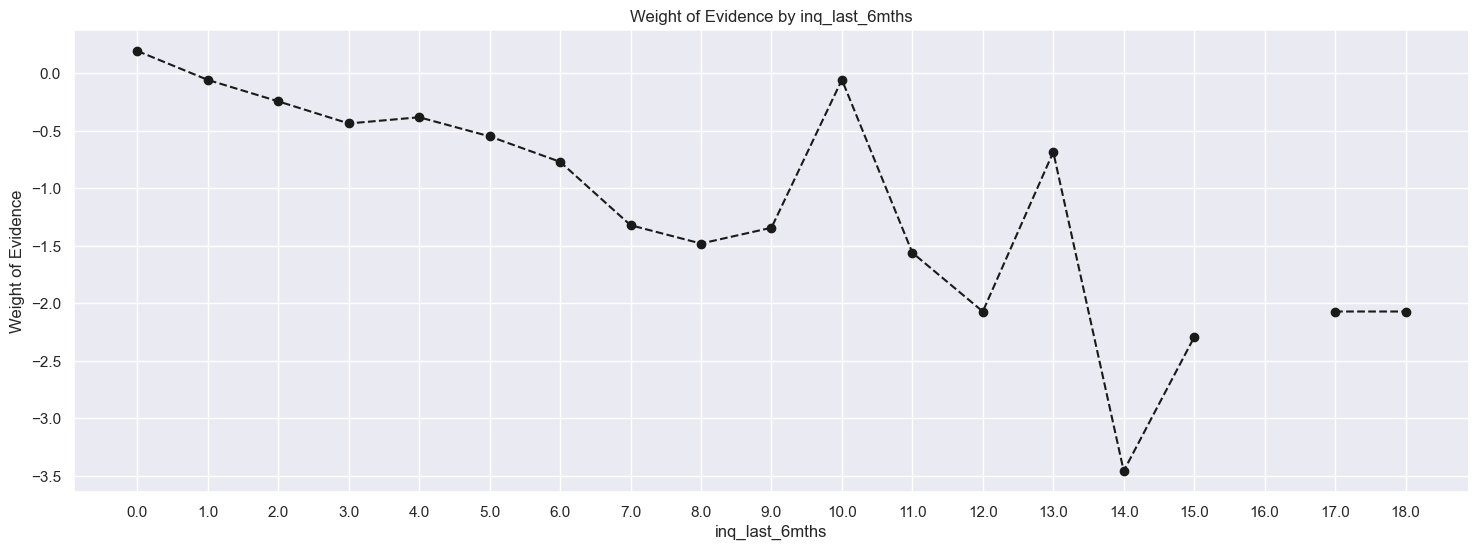

In [265]:
plot_by_woe(df_temp)

In [266]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [267]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\Apratim Narayan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0.0     29   0.758621    0.000078     22.0     7.0     0.000066   
1        1.0    110   0.872727    0.000295     96.0    14.0     0.000290   
2        2.0   1456   0.844780    0.003903   1230.0   226.0     0.003713   
3        3.0   4378   0.872545    0.011736   3820.0   558.0     0.011531   
4        4.0  10028   0.889609    0.026883   8921.0  1107.0     0.026930   
5        5.0  17141   0.888688    0.045951  15233.0  1908.0     0.045984   
6        6.0  24621   0.889363    0.066003  21897.0  2724.0     0.066100   
7        7.0  30169   0.888727    0.080876  26812.0  3357.0     0.080937   
8        8.0  33579   0.888710    0.090017  29842.0  3737.0     0.090084   
9        9.0  35251   0.886528    0.094500  31251.0  4000.0     0.094337   
10      10.0  33936   0.886816    0.090974  30095.0  3841.0     0.090848   
11      11.0  31372   0.883590    0.084101  27720.0  3652.0     0.083678   
12      12.0  27699   0.886639    0.074254  24559.0  3140.0     0.074136   
13      13.0  23892   0.892307    0.064049  21319.0  2573.0     0.064356   
14      14.0  19770   0.886596    0.052999  17528.0  2242.0     0.052912   
15      15.0  16228   0.889820    0.043503  14440.0  1788.0     0.043590   
16      16.0  13540   0.890842    0.036298  12062.0  1478.0     0.036411   
17      17.0  10712   0.888256    0.028716   9515.0  1197.0     0.028723   
18      18.0   8606   0.892865    0.023071   7684.0   922.0     0.023196   
19      19.0   6836   0.889263    0.018326   6079.0   757.0     0.018351   
20      20.0   5224   0.890314    0.014004   4651.0   573.0     0.014040   
21      21.0   4242   0.894389    0.011372   3794.0   448.0     0.011453   
22      22.0   3313   0.892243    0.008881   2956.0   357.0     0.008923   
23      23.0   2530   0.898419    0.006782   2273.0   257.0     0.006861   
24      24.0   1979   0.888833    0.005305   1759.0   220.0     0.005310   
25      25.0   1542   0.886511    0.004134   1367.0   175.0     0.004127   
26      26.0   1064   0.903195    0.002852    961.0   103.0     0.002901   
27      27.0    863   0.893395    0.002313    771.0    92.0     0.002327   
28      28.0    613   0.905383    0.001643    555.0    58.0     0.001675   
29      29.0    496   0.889113    0.001330    441.0    55.0     0.001331   
30      30.0    377   0.883289    0.001011    333.0    44.0     0.001005   
31      31.0    285   0.905263    0.000764    258.0    27.0     0.000779   
32      32.0    234   0.893162    0.000627    209.0    25.0     0.000631   
33      33.0    175   0.874286    0.000469    153.0    22.0     0.000462   
34      34.0    145   0.903448    0.000389    131.0    14.0     0.000395   
35      35.0    124   0.919355    0.000332    114.0    10.0     0.000344   
36      36.0    104   0.865385    0.000279     90.0    14.0     0.000272   
37      37.0     79   0.886076    0.000212     70.0     9.0     0.000211   
38      38.0     64   0.875000    0.000172     56.0     8.0     0.000169   
39      39.0     55   0.927273    0.000147     51.0     4.0     0.000154   
40      40.0     30   0.933333    0.000080     28.0     2.0     0.000085   
41      41.0     30   0.866667    0.000080     26.0     4.0     0.000078   
42      42.0     22   0.954545    0.000059     21.0     1.0     0.000063   
43      43.0     15   0.800000    0.000040     12.0     3.0     0.000036   
44      44.0     12   0.916667    0.000032     11.0     1.0     0.000033   
45      45.0     14   0.857143    0.000038     12.0     2.0     0.000036   
46      46.0      5   1.000000    0.000013      5.0     0.0     0.000015   
47      47.0      6   0.833333    0.000016      5.0     1.0     0.000015   
48      48.0      4   1.000000    0.000011      4.0     0.0     0.000012   
49      49.0      6   1.000000    0.000016      6.0     0.0     0.000018   
50      50.0      4   1.000000    0.000011      4.0     0.0     0.000012   
51      51.0      5   1.000000    0.000013      5.0 

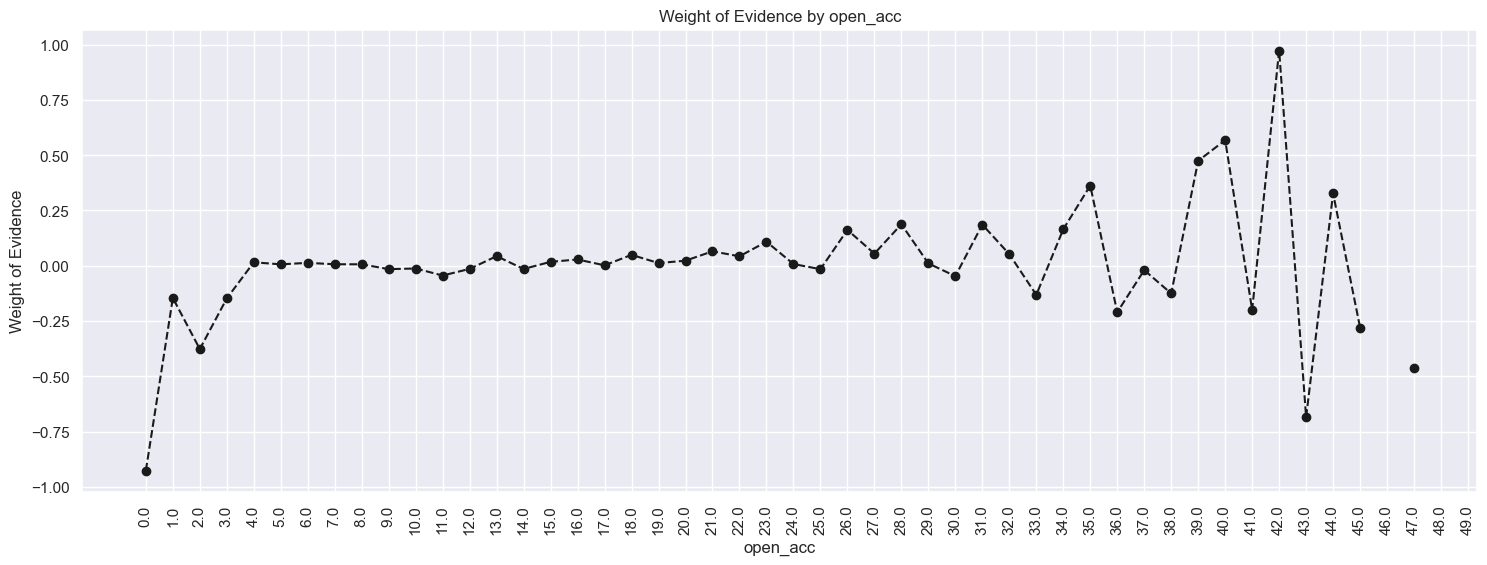

In [268]:
plot_by_woe(df_temp, 90)

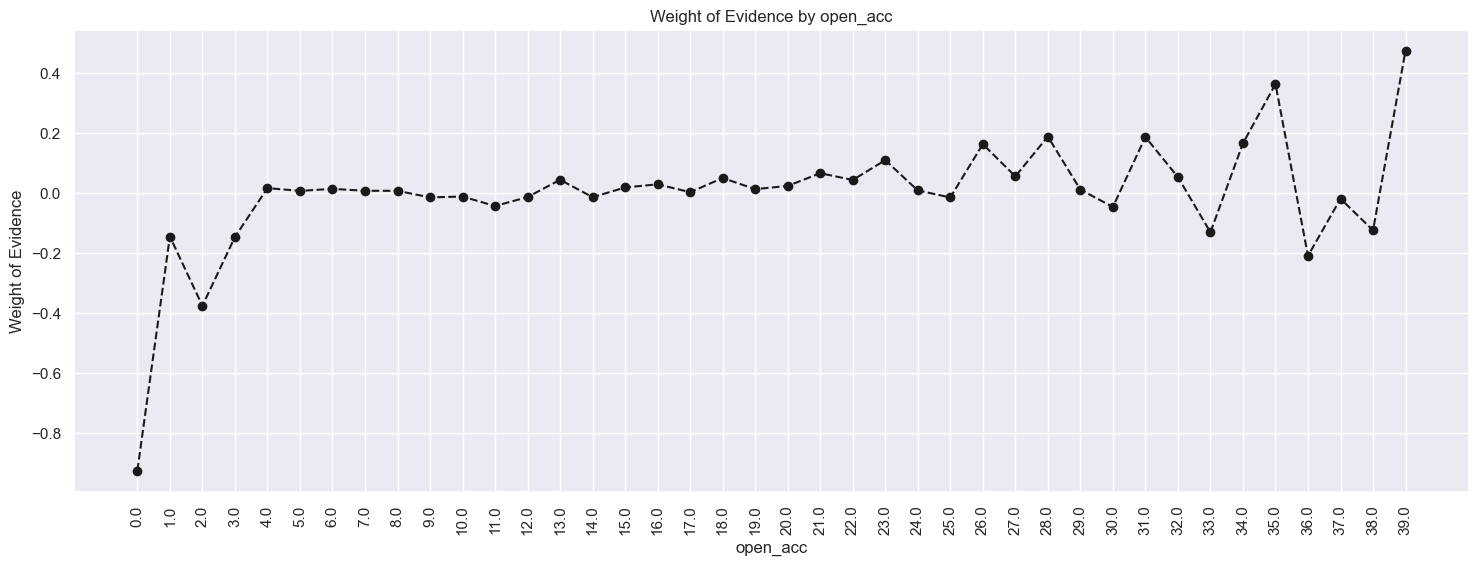

In [269]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [270]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [271]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  323999   0.887416    0.868565  287522.0  36477.0     0.867941   
1       1.0   42381   0.890328    0.113613   37733.0   4648.0     0.113904   
2       2.0    4527   0.897504    0.012136    4063.0    464.0     0.012265   
3       3.0    1280   0.916406    0.003431    1173.0    107.0     0.003541   
4       4.0     408   0.921569    0.001094     376.0     32.0     0.001135   
5       5.0     203   0.911330    0.000544     185.0     18.0     0.000558   
6       6.0     117   0.931624    0.000314     109.0      8.0     0.000329   
7       7.0      48   0.958333    0.000129      46.0      2.0     0.000139   
8       8.0      24   1.000000    0.000064      24.0      0.0     0.000072   
9       9.0      14   0.785714    0.000038      11.0      3.0     0.000033   
10     10.0      10   1.000000    0.000027      10.0      0.0     0.000030   
11     11.0       3   1.000000    0.000008       3.0      0.0     0.000009   
12     12.0       1   1.000000    0.000003       1.0      0.0     0.000003   
13     13.0       2   1.000000    0.000005       2.0      0.0     0.000006   
14     15.0       1   1.000000    0.000003       1.0      0.0     0.000003   
15     16.0       1   1.000000    0.000003       1.0      0.0     0.000003   
16     17.0       1   1.000000    0.000003       1.0      0.0     0.000003   
17     18.0       2   1.000000    0.000005       2.0      0.0     0.000006   
18     19.0       1   1.000000    0.000003       1.0      0.0     0.000003   
19     21.0       1   1.000000    0.000003       1.0      0.0     0.000003   
20     34.0       1   1.000000    0.000003       1.0      0.0     0.000003   
21     40.0       1   1.000000    0.000003       1.0      0.0     0.000003   
22     54.0       1   1.000000    0.000003       1.0      0.0     0.000003   
23     63.0       1   1.000000    0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.873512 -0.006398             NaN       NaN  inf  
1     0.111305  0.023082        0.002912  0.029481  inf  
2     0.011111  0.098777        0.007176  0.075694  inf  
3     0.002562  0.323475        0.018902  0.224699  inf  
4     0.000766  0.392838        0.005162  0.069362  inf  
5     0.000431  0.258968        0.010239  0.133869  inf  
6     0.000192  0.540891        0.020294  0.281922  inf  
7     0.000048  1.064478        0.026709  0.523588  inf  
8     0.000000       inf        0.041667       inf  inf  
9     0.000072 -0.771733        0.214286       inf  inf  
10    0.000000       inf        0.214286       inf  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf

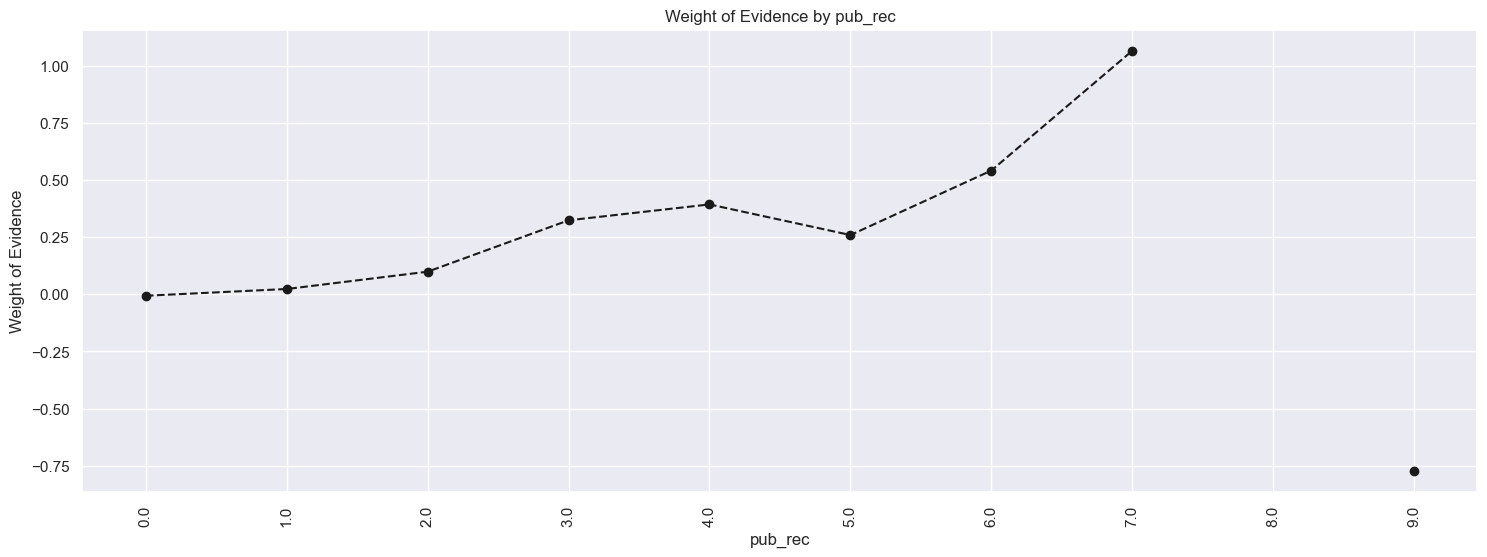

In [272]:
plot_by_woe(df_temp, 90)

In [273]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [274]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-0.15, 3.0]    459   0.810458    0.001230    372.0    87.0   
1        (3.0, 6.0]   6004   0.862758    0.016095   5180.0   824.0   
2        (6.0, 9.0]  15047   0.870140    0.040337  13093.0  1954.0   
3       (9.0, 12.0]  25169   0.878621    0.067472  22114.0  3055.0   
4      (12.0, 15.0]  33651   0.878934    0.090210  29577.0  4074.0   
5      (15.0, 18.0]  38711   0.884400    0.103775  34236.0  4475.0   
6      (18.0, 21.0]  40599   0.883741    0.108836  35879.0  4720.0   
7      (21.0, 24.0]  40163   0.888878    0.107668  35700.0  4463.0   
8      (24.0, 27.0]  36286   0.892603    0.097274  32389.0  3897.0   
9      (27.0, 30.0]  31775   0.896617    0.085181  28490.0  3285.0   
10     (30.0, 33.0]  25900   0.892548    0.069432  23117.0  2783.0   
11     (33.0, 36.0]  20748   0.896568    0.055620  18602.0  2146.0   
12     (36.0, 39.0]  16055   0.898661    0.043040  14428.0  1627.0   
13     (39.0, 42.0]  12134   0.898962    0.032528  10908.0  1226.0   
14     (42.0, 45.0]   9107   0.893928    0.024414   8141.0   966.0   
15     (45.0, 48.0]   6494   0.891130    0.017409   5787.0   707.0   
16     (48.0, 51.0]   4551   0.897605    0.012200   4085.0   466.0   
17     (51.0, 54.0]   3260   0.906748    0.008739   2956.0   304.0   
18     (54.0, 57.0]   2146   0.901212    0.005753   1934.0   212.0   
19     (57.0, 60.0]   1605   0.892835    0.004303   1433.0   172.0   
20     (60.0, 63.0]   2164   0.896488    0.005801   1940.0   224.0   
21     (63.0, 66.0]    317   0.908517    0.000850    288.0    29.0   
22     (66.0, 69.0]    218   0.912844    0.000584    199.0    19.0   
23     (69.0, 72.0]    120   0.925000    0.000322    111.0     9.0   
24     (72.0, 75.0]    114   0.885965    0.000306    101.0    13.0   
25     (75.0, 78.0]     64   0.875000    0.000172     56.0     8.0   
26     (78.0, 81.0]     52   0.903846    0.000139     47.0     5.0   
27     (81.0, 84.0]     25   0.880000    0.000067     22.0     3.0   
28     (84.0, 87.0]     28   0.964286    0.000075     27.0     1.0   
29     (87.0, 90.0]     22   0.909091    0.000059     20.0     2.0   
30     (90.0, 93.0]     12   0.916667    0.000032     11.0     1.0   
31     (93.0, 96.0]      8   0.875000    0.000021      7.0     1.0   
32     (96.0, 99.0]      4   0.750000    0.000011      3.0     1.0   
33    (99.0, 102.0]      4   1.000000    0.000011      4.0     0.0   
34   (102.0, 105.0]      4   1.000000    0.000011      4.0     0.0   
35   (105.0, 108.0]      1   1.000000    0.000003      1.0     0.0   
36   (108.0, 111.0]      0        NaN    0.000000      NaN     NaN   
37   (111.0, 114.0]      0        NaN    0.000000      NaN     NaN   
38   (114.0, 117.0]      2   1.000000    0.000005      2.0     0.0   
39   (117.0, 120.0]      2   1.000000    0.000005      2.0     0.0   
40   (120.0, 123.0]      1   1.000000    0.000003      1.0     0.0   
41   (123.0, 126.0]      1   1.000000    0.000003      1.0     0.0   
42   (126.0, 129.0]      0        NaN    0.000000      NaN     NaN   
43   (129.0, 132.0]      0        NaN    0.000000      NaN     NaN   
44   (132.0, 135.0]      0        NaN    0.000000      NaN     NaN   
45   (135.0, 138.0]      0        NaN    0.000000      NaN     NaN   
46   (138.0, 141.0]      0        NaN    0.000000      NaN     NaN   
47   (141.0, 144.0]      0        NaN    0.000000      NaN     NaN   
48   (144.0, 147.0]      0        NaN    0.000000      NaN     NaN   
49   (147.0, 150.0]      1   1.000000    0.000003      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001123    0.002083 -0.618030             NaN       NaN  inf  
1      0.015637    0.019732 -0.232626        0.052301  0.385404  inf  
2      0.039524    0.046792 -0.168817        0.007382  0.063809  inf  
3      0.066755    0.073158 -0.091584        0.008480  0.077232  inf  
4      0.089284    0.097560 -0.088644        0.000313  0.002940  inf  
5     

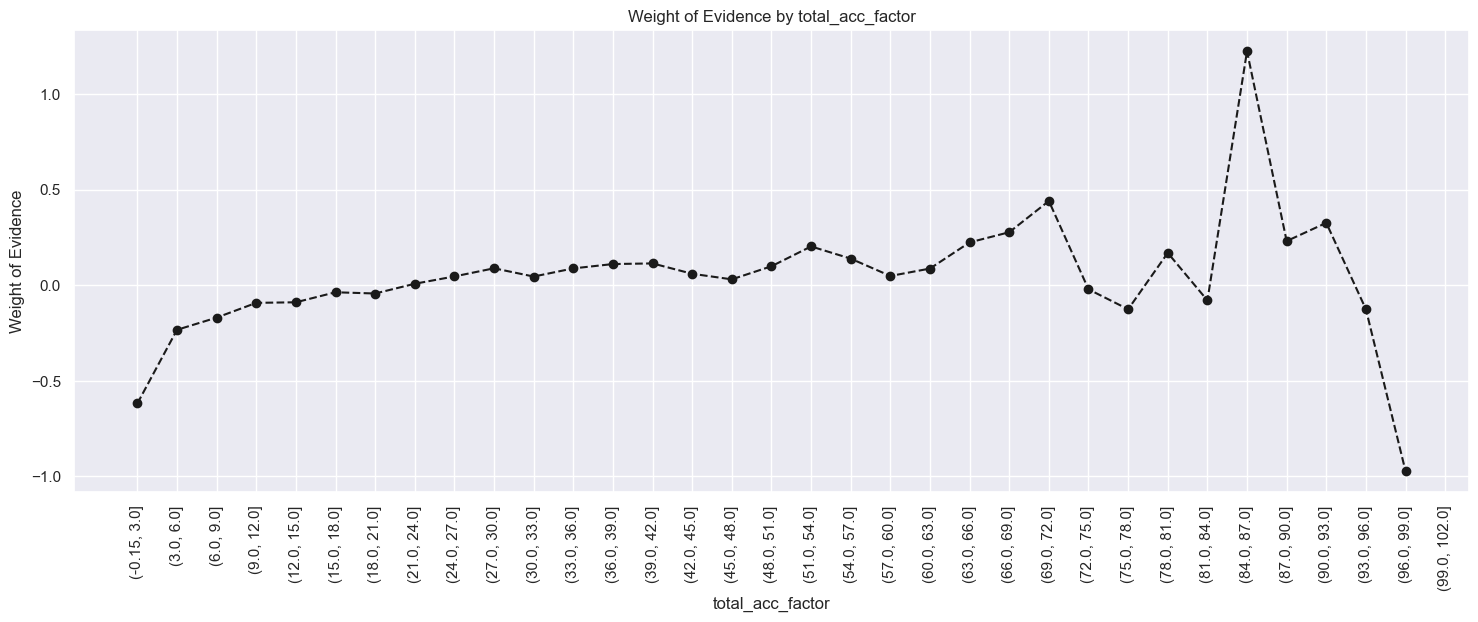

In [275]:
plot_by_woe(df_temp, 90)

In [276]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [277]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  371682   0.888025    0.996392  330063.0  41619.0   
1             1.0    1263   0.894695    0.003386    1130.0    133.0   
2             2.0      70   0.928571    0.000188      65.0      5.0   
3             3.0       7   0.857143    0.000019       6.0      1.0   
4             4.0       4   1.000000    0.000011       4.0      0.0   
5             5.0       2   0.500000    0.000005       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996359    0.996647 -0.000289             NaN       NaN  inf  
1     0.003411    0.003185  0.068608        0.006670  0.068897  inf  
2     0.000196    0.000120  0.493934        0.033876  0.425326  inf  
3     0.000018    0.000024 -0.279256        0.071429  0.773190  inf  
4     0.000012    0.000000       inf        0.142857       inf  inf  
5     0.000003    0.000024 -2.071016        0.500000       inf  inf

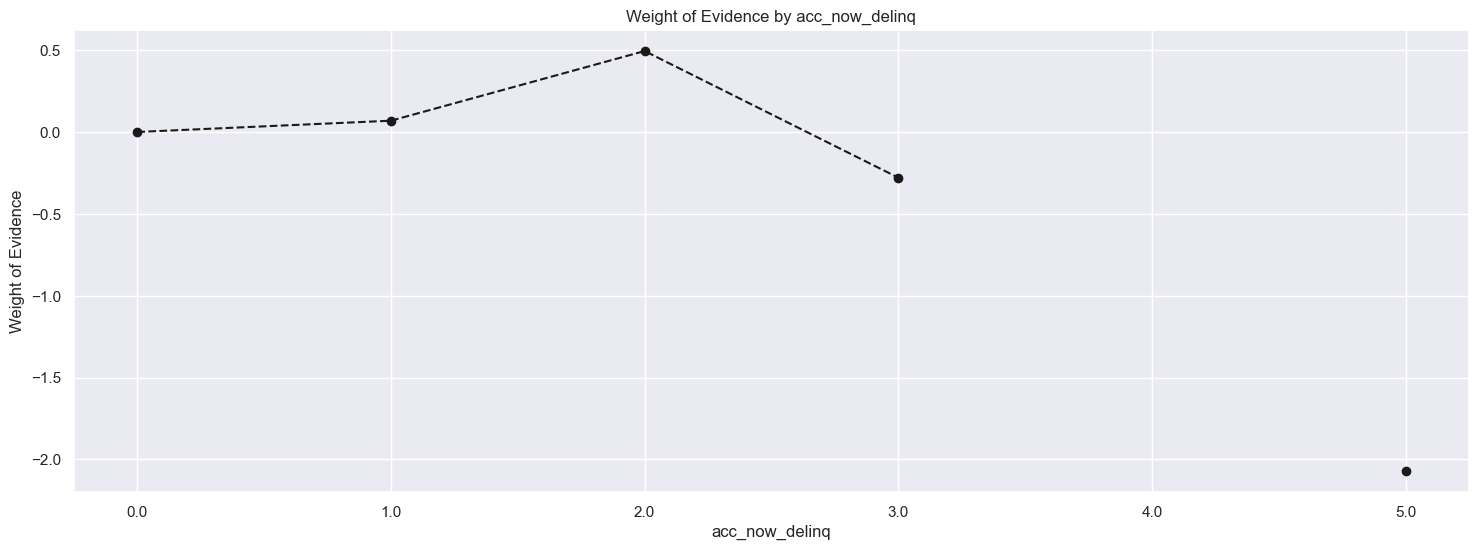

In [278]:
plot_by_woe(df_temp)

In [279]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [280]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
C:\Users\Apratim Narayan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kw

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]  19417   0.863779    0.052052  16772.0   
1             (5000.0, 9999.999]  52655   0.873516    0.141156  45995.0   
2          (9999.999, 14999.998]  59570   0.877556    0.159693  52276.0   
3         (14999.998, 19999.998]  51455   0.874628    0.137939  45004.0   
4         (19999.998, 24999.997]  41582   0.882882    0.111472  36712.0   
5         (24999.997, 29999.997]  32093   0.886860    0.086034  28462.0   
6         (29999.997, 34999.996]  24516   0.891826    0.065722  21864.0   
7         (34999.996, 39999.996]  19767   0.901351    0.052991  17817.0   
8         (39999.996, 44999.996]  14719   0.911951    0.039458  13423.0   
9         (44999.996, 49999.995]  11585   0.910401    0.031057  10547.0   
10        (49999.995, 54999.994]   8964   0.915328    0.024030   8205.0   
11        (54999.994, 59999.994]   6681   0.925311    0.017910   6182.0   
12        (59999.994, 64999.994]   5311   0.930522    0.014238   4942.0   
13        (64999.994, 69999.993]   4305   0.921487    0.011541   3967.0   
14        (69999.993, 74999.992]   3405   0.930396    0.009128   3168.0   
15        (74999.992, 79999.992]   2646   0.922525    0.007093   2441.0   
16        (79999.992, 84999.992]   2196   0.930783    0.005887   2044.0   
17        (84999.992, 89999.991]   1776   0.925113    0.004761   1643.0   
18         (89999.991, 94999.99]   1420   0.931690    0.003807   1323.0   
19          (94999.99, 99999.99]   1178   0.951613    0.003158   1121.0   
20         (99999.99, 104999.99]   1024   0.947266    0.002745    970.0   
21       (104999.99, 109999.989]    848   0.944575    0.002273    801.0   
22      (109999.989, 114999.988]    695   0.948201    0.001863    659.0   
23      (114999.988, 119999.988]    627   0.934609    0.001681    586.0   
24      (119999.988, 124999.988]    471   0.944798    0.001263    445.0   
25      (124999.988, 129999.987]    441   0.929705    0.001182    410.0   
26      (129999.987, 134999.986]    339   0.949853    0.000909    322.0   
27      (134999.986, 139999.986]    298   0.953020    0.000799    284.0   
28      (139999.986, 144999.986]    309   0.938511    0.000828    290.0   
29      (144999.986, 149999.985]    247   0.947368    0.000662    234.0   
30      (149999.985, 154999.984]    210   0.928571    0.000563    195.0   
31      (154999.984, 159999.984]    215   0.962791    0.000576    207.0   
32      (159999.984, 164999.984]    183   0.950820    0.000491    174.0   
33      (164999.984, 169999.983]    162   0.956790    0.000434    155.0   
34      (169999.983, 174999.982]    127   0.913386    0.000340    116.0   
35      (174999.982, 179999.982]    116   0.939655    0.000311    109.0   
36      (179999.982, 184999.982]     98   0.989796    0.000263     97.0   
37      (184999.982, 189999.981]    110   0.945455    0.000295    104.0   
38       (189999.981, 194999.98]     84   0.952381    0.000225     80.0   
39        (194999.98, 199999.98]     70   0.914286    0.000188     64.0   
40        (199999.98, 204999.98]     85   0.976471    0.000228     83.0   
41       (204999.98, 209999.979]     73   0.945205    0.000196     69.0   
42      (209999.979, 214999.978]     58   0.982759    0.000155     57.0   
43      (214999.978, 219999.978]     62   0.919355    0.000166     57.0   
44      (219999.978, 224999.978]     54   0.925926    0.000145     50.0   
45      (224999.978, 229999.977]     37   0.945946    0.000099     35.0   
46      (229999.977, 234999.976]     55   0.909091    0.000147     50.0   
47      (234999.976, 239999.976]     41   0.951220    0.000110     39.0   
48      (239999.976, 244999.976]     35   0.971429    0.000094     34.0   
49      (244999.976, 249999.975]     31   0.967742    0.000083     30.0   
50      (249999.975, 254999.974]     26   0.923077    0.000070     24.0   
51      (254999.974, 259999.974]     30   0.900000    0.000080     27.0   
52      (259999.974, 264999.974]  

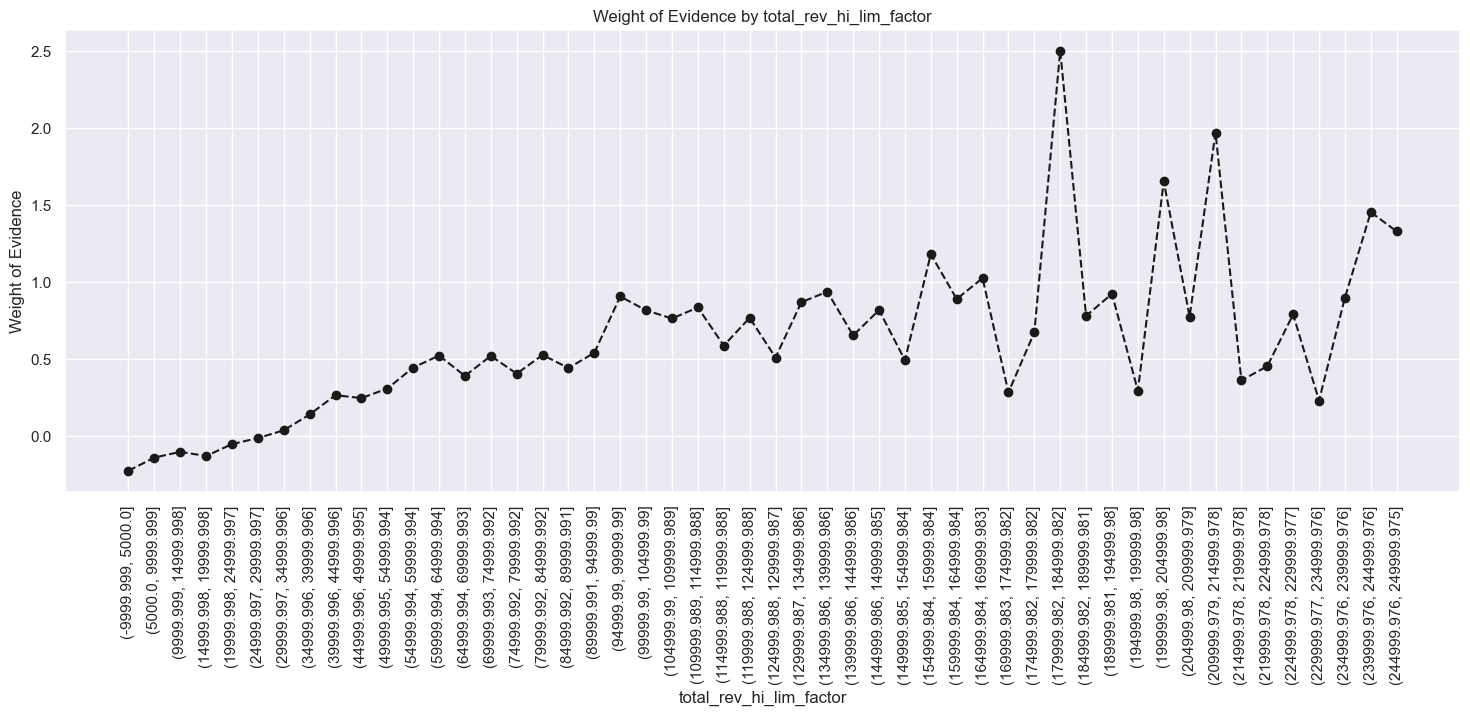

In [281]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [282]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [283]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


installment_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (14.276, 43.556]   1812   0.905629    0.004858   1641.0   171.0   
1       (43.556, 71.443]   4841   0.896302    0.012978   4339.0   502.0   
2       (71.443, 99.329]   6824   0.891266    0.018294   6082.0   742.0   
3      (99.329, 127.216]   9138   0.887722    0.024497   8112.0  1026.0   
4     (127.216, 155.102]  10040   0.893625    0.026915   8972.0  1068.0   
5     (155.102, 182.988]  16816   0.892602    0.045080  15010.0  1806.0   
6     (182.988, 210.875]  17216   0.902533    0.046152  15538.0  1678.0   
7     (210.875, 238.761]  15090   0.898608    0.040453  13560.0  1530.0   
8     (238.761, 266.648]  18842   0.899108    0.050511  16941.0  1901.0   
9     (266.648, 294.534]  20100   0.889005    0.053883  17869.0  2231.0   
10     (294.534, 322.42]  20364   0.894422    0.054591  18214.0  2150.0   
11     (322.42, 350.307]  25521   0.886525    0.068416  22625.0  2896.0   
12    (350.307, 378.193]  19006   0.882300    0.050951  16769.0  2237.0   
13     (378.193, 406.08]  18079   0.891310    0.048466  16114.0  1965.0   
14     (406.08, 433.966]  13345   0.875759    0.035775  11687.0  1658.0   
15    (433.966, 461.852]  12574   0.879911    0.033708  11064.0  1510.0   
16    (461.852, 489.739]  15685   0.891106    0.042048  13977.0  1708.0   
17    (489.739, 517.625]  15648   0.889507    0.041949  13919.0  1729.0   
18    (517.625, 545.512]  10775   0.861439    0.028885   9282.0  1493.0   
19    (545.512, 573.398]  10558   0.874029    0.028304   9228.0  1330.0   
20    (573.398, 601.284]   9464   0.876162    0.025371   8292.0  1172.0   
21    (601.284, 629.171]   9341   0.903115    0.025041   8436.0   905.0   
22    (629.171, 657.057]   8357   0.895058    0.022403   7480.0   877.0   
23    (657.057, 684.944]   9171   0.888453    0.024585   8148.0  1023.0   
24     (684.944, 712.83]   6171   0.874899    0.016543   5399.0   772.0   
25     (712.83, 740.716]   4841   0.881636    0.012978   4268.0   573.0   
26    (740.716, 768.603]   5231   0.892181    0.014023   4667.0   564.0   
27    (768.603, 796.489]   4926   0.901746    0.013205   4442.0   484.0   
28    (796.489, 824.376]   4050   0.886420    0.010857   3590.0   460.0   
29    (824.376, 852.262]   3643   0.884161    0.009766   3221.0   422.0   
30    (852.262, 880.148]   4260   0.890845    0.011420   3795.0   465.0   
31    (880.148, 908.035]   3247   0.864798    0.008704   2808.0   439.0   
32    (908.035, 935.921]   2189   0.871174    0.005868   1907.0   282.0   
33    (935.921, 963.808]   2440   0.870082    0.006541   2123.0   317.0   
34    (963.808, 991.694]   1787   0.828763    0.004791   1481.0   306.0   
35    (991.694, 1019.58]   1617   0.853432    0.004335   1380.0   237.0   
36   (1019.58, 1047.467]   1267   0.865036    0.003397   1096.0   171.0   
37  (1047.467, 1075.353]    898   0.887528    0.002407    797.0   101.0   
38   (1075.353, 1103.24]   1035   0.926570    0.002775    959.0    76.0   
39   (1103.24, 1131.126]    832   0.918269    0.002230    764.0    68.0   
40  (1131.126, 1159.012]    972   0.918724    0.002606    893.0    79.0   
41  (1159.012, 1186.899]   1181   0.911939    0.003166   1077.0   104.0   
42  (1186.899, 1214.785]   1252   0.897764    0.003356   1124.0   128.0   
43  (1214.785, 1242.672]   1019   0.884200    0.002732    901.0   118.0   
44  (1242.672, 1270.558]    711   0.850914    0.001906    605.0   106.0   
45  (1270.558, 1298.444]    457   0.818381    0.001225    374.0    83.0   
46  (1298.444, 1326.331]    197   0.756345    0.000528    149.0    48.0   
47  (1326.331, 1354.217]    121   0.760331    0.000324     92.0    29.0   
48  (1354.217, 1382.104]     41   0.707317    0.000110     29.0    12.0   
49   (1382.104, 1409.99]     36   0.805556    0.000097     29.0     7.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.004954    0.004095  0.190382             NaN       NaN  0.014179  
1      0.013098    0.012021 

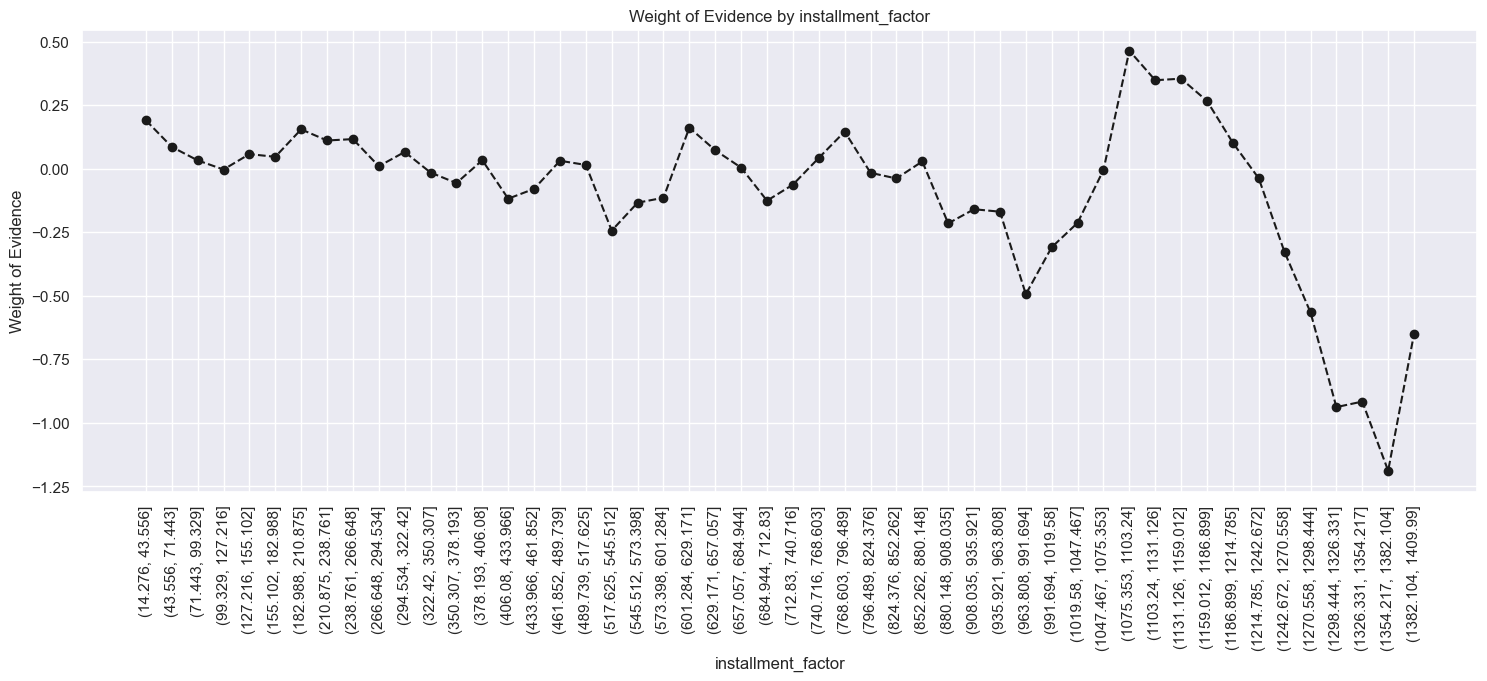

In [284]:
plot_by_woe(df_temp, 90)

In [285]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0     (-5243.882, 144693.64]  351904   0.885921    0.943372  311759.0   
1     (144693.64, 287491.28]   19004   0.923016    0.050945   17541.0   
2     (287491.28, 430288.92]    1525   0.927869    0.004088    1415.0   
3     (430288.92, 573086.56]     332   0.939759    0.000890     312.0   
4      (573086.56, 715884.2]     112   0.883929    0.000300      99.0   
5      (715884.2, 858681.84]      65   0.892308    0.000174      58.0   
6    (858681.84, 1001479.48]      39   0.974359    0.000105      38.0   
7   (1001479.48, 1144277.12]      10   1.000000    0.000027      10.0   
8   (1144277.12, 1287074.76]      12   1.000000    0.000032      12.0   
9    (1287074.76, 1429872.4]       6   1.000000    0.000016       6.0   
10   (1429872.4, 1572670.04]       3   1.000000    0.000008       3.0   
11  (1572670.04, 1715467.68]       1   1.000000    0.000003       1.0   
12  (1715467.68, 1858265.32]       1   1.000000    0.000003       1.0   
13  (1858265.32, 2001062.96]       6   1.000000    0.000016       6.0   
14   (2001062.96, 2143860.6]       1   1.000000    0.000003       1.0   
15   (2143860.6, 2286658.24]       0        NaN    0.000000       NaN   
16  (2286658.24, 2429455.88]       0        NaN    0.000000       NaN   
17  (2429455.88, 2572253.52]       0        NaN    0.000000       NaN   
18  (2572253.52, 2715051.16]       0        NaN    0.000000       NaN   
19   (2715051.16, 2857848.8]       0        NaN    0.000000       NaN   
20   (2857848.8, 3000646.44]       0        NaN    0.000000       NaN   
21  (3000646.44, 3143444.08]       0        NaN    0.000000       NaN   
22  (3143444.08, 3286241.72]       0        NaN    0.000000       NaN   
23  (3286241.72, 3429039.36]       0        NaN    0.000000       NaN   
24   (3429039.36, 3571837.0]       0        NaN    0.000000       NaN   
25   (3571837.0, 3714634.64]       0        NaN    0.000000       NaN   
26  (3714634.64, 3857432.28]       0        NaN    0.000000       NaN   
27  (3857432.28, 4000229.92]       1   1.000000    0.000003       1.0   
28  (4000229.92, 4143027.56]       0        NaN    0.000000       NaN   
29   (4143027.56, 4285825.2]       0        NaN    0.000000       NaN   
30   (4285825.2, 4428622.84]       0        NaN    0.000000       NaN   
31  (4428622.84, 4571420.48]       1   1.000000    0.000003       1.0   
32  (4571420.48, 4714218.12]       0        NaN    0.000000       NaN   
33  (4714218.12, 4857015.76]       0        NaN    0.000000       NaN   
34   (4857015.76, 4999813.4]       1   1.000000    0.000003       1.0   
35   (4999813.4, 5142611.04]       1   1.000000    0.000003       1.0   
36  (5142611.04, 5285408.68]       0        NaN    0.000000       NaN   
37  (5285408.68, 5428206.32]       0        NaN    0.000000       NaN   
38  (5428206.32, 5571003.96]       0        NaN    0.000000       NaN   
39   (5571003.96, 5713801.6]       0        NaN    0.000000       NaN   
40   (5713801.6, 5856599.24]       0        NaN    0.000000       NaN   
41  (5856599.24, 5999396.88]       0        NaN    0.000000       NaN   
42  (5999396.88, 6142194.52]       2   1.000000    0.000005       2.0   
43  (6142194.52, 6284992.16]       0        NaN    0.000000       NaN   
44   (6284992.16, 6427789.8]       0        NaN    0.000000       NaN   
45   (6427789.8, 6570587.44]       0        NaN    0.000000       NaN   
46  (6570587.44, 6713385.08]       0        NaN    0.000000       NaN   
47  (6713385.08, 6856182.72]       0        NaN    0.000000       NaN   
48  (6856182.72, 6998980.36]       0        NaN    0.000000       NaN   
49   (6998980.36, 7141778.0]       1   1.000000    0.000003       1.0   

      n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0   40145.0     0.941105    0.961350 -0.021283             NaN       NaN  inf  
1    1463.0     0.052951    0.035034  0.413036        0.037096  0.434319  inf  
2     110.0     0.004271    0.002634  0.483389 

In [286]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good  \
0      (-5243.882, 73294.82]  231445   0.873231    0.620449  202105.0   
1      (73294.82, 144693.64]  120459   0.910301    0.322922  109654.0   
2     (144693.64, 216092.46]   15885   0.922694    0.042584   14657.0   
3     (216092.46, 287491.28]    3119   0.924655    0.008361    2884.0   
4      (287491.28, 358890.1]    1117   0.925694    0.002994    1034.0   
5      (358890.1, 430288.92]     408   0.933824    0.001094     381.0   
6     (430288.92, 501687.74]     245   0.946939    0.000657     232.0   
7     (501687.74, 573086.56]      87   0.919540    0.000233      80.0   
8     (573086.56, 644485.38]      61   0.868852    0.000164      53.0   
9      (644485.38, 715884.2]      51   0.901961    0.000137      46.0   
10     (715884.2, 787283.02]      37   0.945946    0.000099      35.0   
11    (787283.02, 858681.84]      28   0.821429    0.000075      23.0   
12    (858681.84, 930080.66]      17   1.000000    0.000046      17.0   
13   (930080.66, 1001479.48]      22   0.954545    0.000059      21.0   
14   (1001479.48, 1072878.3]       3   1.000000    0.000008       3.0   
15   (1072878.3, 1144277.12]       7   1.000000    0.000019       7.0   
16  (1144277.12, 1215675.94]       8   1.000000    0.000021       8.0   
17  (1215675.94, 1287074.76]       4   1.000000    0.000011       4.0   
18  (1287074.76, 1358473.58]       4   1.000000    0.000011       4.0   
19   (1358473.58, 1429872.4]       2   1.000000    0.000005       2.0   
20   (1429872.4, 1501271.22]       2   1.000000    0.000005       2.0   
21  (1501271.22, 1572670.04]       1   1.000000    0.000003       1.0   
22  (1572670.04, 1644068.86]       1   1.000000    0.000003       1.0   
23  (1644068.86, 1715467.68]       0        NaN    0.000000       NaN   
24   (1715467.68, 1786866.5]       1   1.000000    0.000003       1.0   
25   (1786866.5, 1858265.32]       0        NaN    0.000000       NaN   
26  (1858265.32, 1929664.14]       1   1.000000    0.000003       1.0   
27  (1929664.14, 2001062.96]       5   1.000000    0.000013       5.0   
28  (2001062.96, 2072461.78]       1   1.000000    0.000003       1.0   
29   (2072461.78, 2143860.6]       0        NaN    0.000000       NaN   
30   (2143860.6, 2215259.42]       0        NaN    0.000000       NaN   
31  (2215259.42, 2286658.24]       0        NaN    0.000000       NaN   
32  (2286658.24, 2358057.06]       0        NaN    0.000000       NaN   
33  (2358057.06, 2429455.88]       0        NaN    0.000000       NaN   
34   (2429455.88, 2500854.7]       0        NaN    0.000000       NaN   
35   (2500854.7, 2572253.52]       0        NaN    0.000000       NaN   
36  (2572253.52, 2643652.34]       0        NaN    0.000000       NaN   
37  (2643652.34, 2715051.16]       0        NaN    0.000000       NaN   
38  (2715051.16, 2786449.98]       0        NaN    0.000000       NaN   
39   (2786449.98, 2857848.8]       0        NaN    0.000000       NaN   
40   (2857848.8, 2929247.62]       0        NaN    0.000000       NaN   
41  (2929247.62, 3000646.44]       0        NaN    0.000000       NaN   
42  (3000646.44, 3072045.26]       0        NaN    0.000000       NaN   
43  (3072045.26, 3143444.08]       0        NaN    0.000000       NaN   
44   (3143444.08, 3214842.9]       0        NaN    0.000000       NaN   
45   (3214842.9, 3286241.72]       0        NaN    0.000000       NaN   
46  (3286241.72, 3357640.54]       0        NaN    0.000000       NaN   
47  (3357640.54, 3429039.36]       0        NaN    0.000000       NaN   
48  (3429039.36, 3500438.18]       0        NaN    0.000000       NaN   
49   (3500438.18, 3571837.0]       0        NaN    0.000000       NaN   
50   (3571837.0, 3643235.82]       0        NaN    0.000000       NaN   
51  (3643235.82, 3714634.64]       0        NaN    0.000000       NaN   
52  (3714634.64, 3786033.46]       0        NaN    0.000000       NaN   
53  (3786033.46, 3857432.28]       0        NaN    0.000000       NaN

In [287]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [288]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\25049378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprec

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (1757.896, 4658.08]     15   0.800000    0.000043     12.0     3.0   
1       (4658.08, 7420.16]     40   0.750000    0.000114     30.0    10.0   
2      (7420.16, 10182.24]    287   0.874564    0.000818    251.0    36.0   
3     (10182.24, 12944.32]    547   0.820841    0.001558    449.0    98.0   
4      (12944.32, 15706.4]   1210   0.825620    0.003447    999.0   211.0   
5      (15706.4, 18468.48]   1522   0.846255    0.004335   1288.0   234.0   
6     (18468.48, 21230.56]   2928   0.853825    0.008340   2500.0   428.0   
7     (21230.56, 23992.64]   2495   0.842084    0.007107   2101.0   394.0   
8     (23992.64, 26754.72]   7016   0.845924    0.019985   5935.0  1081.0   
9      (26754.72, 29516.8]   5643   0.854864    0.016074   4824.0   819.0   
10     (29516.8, 32278.88]  11915   0.856987    0.033940  10211.0  1704.0   
11    (32278.88, 35040.96]  12241   0.858508    0.034868  10509.0  1732.0   
12    (35040.96, 37803.04]   7905   0.856420    0.022517   6770.0  1135.0   
13    (37803.04, 40565.12]  17910   0.863819    0.051017  15471.0  2439.0   
14     (40565.12, 43327.2]  12508   0.866645    0.035629  10840.0  1668.0   
15     (43327.2, 46089.28]  16590   0.869681    0.047257  14428.0  2162.0   
16    (46089.28, 48851.36]   9878   0.874165    0.028137   8635.0  1243.0   
17    (48851.36, 51613.44]  19024   0.876630    0.054190  16677.0  2347.0   
18    (51613.44, 54375.52]  12766   0.884145    0.036364  11287.0  1479.0   
19     (54375.52, 57137.6]  16153   0.884727    0.046012  14291.0  1862.0   
20     (57137.6, 59899.68]   6482   0.882444    0.018464   5720.0   762.0   
21    (59899.68, 62661.76]  21299   0.878210    0.060670  18705.0  2594.0   
22    (62661.76, 65423.84]  16090   0.886948    0.045832  14271.0  1819.0   
23    (65423.84, 68185.92]   7942   0.894989    0.022623   7108.0   834.0   
24     (68185.92, 70948.0]  12982   0.891388    0.036979  11572.0  1410.0   
25     (70948.0, 73710.08]   8385   0.896005    0.023885   7513.0   872.0   
26    (73710.08, 76472.16]  13145   0.899201    0.037444  11820.0  1325.0   
27    (76472.16, 79234.24]   5679   0.899630    0.016177   5109.0   570.0   
28    (79234.24, 81996.32]  11397   0.899184    0.032464  10248.0  1149.0   
29     (81996.32, 84758.4]   6063   0.910440    0.017270   5520.0   543.0   
30     (84758.4, 87520.48]   9980   0.906313    0.028428   9045.0   935.0   
31    (87520.48, 90282.56]  10393   0.906572    0.029604   9422.0   971.0   
32    (90282.56, 93044.64]   4337   0.911921    0.012354   3955.0   382.0   
33    (93044.64, 95806.72]   5634   0.912141    0.016048   5139.0   495.0   
34     (95806.72, 98568.8]   4667   0.907649    0.013294   4236.0   431.0   
35    (98568.8, 101330.88]   8793   0.911975    0.025047   8019.0   774.0   
36  (101330.88, 104092.96]   3232   0.918317    0.009206   2968.0   264.0   
37  (104092.96, 106855.04]   3736   0.922109    0.010642   3445.0   291.0   
38  (106855.04, 109617.12]   2277   0.919631    0.006486   2094.0   183.0   
39   (109617.12, 112379.2]   5714   0.913721    0.016276   5221.0   493.0   
40   (112379.2, 115141.28]   3218   0.937228    0.009166   3016.0   202.0   
41  (115141.28, 117903.36]   1128   0.916667    0.003213   1034.0    94.0   
42  (117903.36, 120665.44]   6228   0.909762    0.017740   5666.0   562.0   
43  (120665.44, 123427.52]   1043   0.933845    0.002971    974.0    69.0   
44   (123427.52, 126189.6]   3566   0.918396    0.010158   3275.0   291.0   
45   (126189.6, 128951.68]    791   0.917826    0.002253    726.0    65.0   
46  (128951.68, 131713.76]   3033   0.927465    0.008639   2813.0   220.0   
47  (131713.76, 134475.84]    801   0.918851    0.002282    736.0    65.0   
48  (134475.84, 137237.92]   1902   0.939537    0.005418   1787.0   115.0   
49   (137237.92, 140000.0]   2532   0.921406    0.007212   2333.0   199.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    

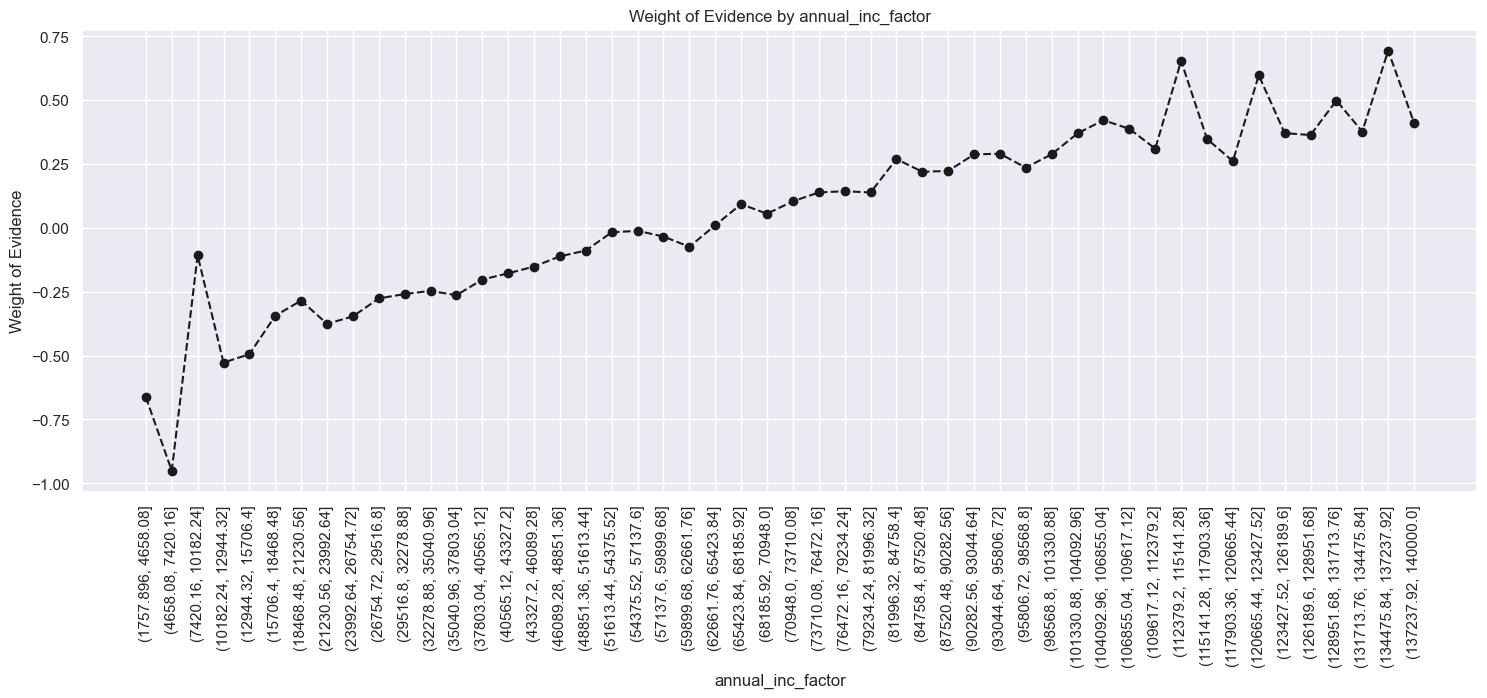

In [289]:
plot_by_woe(df_temp, 90)

In [290]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [291]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3988296756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default o

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.188, 3.76]   5277   0.867728    0.030531   4579.0   
1                   (3.76, 7.52]  11167   0.883406    0.064608   9865.0   
2                  (7.52, 11.28]  13306   0.890050    0.076983  11843.0   
3                 (11.28, 15.04]  13216   0.884912    0.076462  11695.0   
4                  (15.04, 18.8]   9337   0.891507    0.054020   8324.0   
5                  (18.8, 22.56]  11641   0.888669    0.067350  10345.0   
6                 (22.56, 26.32]  10887   0.893083    0.062988   9723.0   
7                 (26.32, 30.08]  10560   0.890814    0.061096   9407.0   
8                 (30.08, 33.84]   7576   0.899419    0.043832   6814.0   
9                  (33.84, 37.6]   9795   0.894946    0.056670   8766.0   
10                 (37.6, 41.36]   9352   0.888794    0.054107   8312.0   
11                (41.36, 45.12]   9202   0.893610    0.053239   8223.0   
12                (45.12, 48.88]   6538   0.895228    0.037826   5853.0   
13                (48.88, 52.64]   6486   0.886679    0.037525   5751.0   
14                 (52.64, 56.4]   6045   0.889495    0.034974   5377.0   
15                 (56.4, 60.16]   5867   0.900119    0.033944   5281.0   
16                (60.16, 63.92]   4040   0.884406    0.023374   3573.0   
17                (63.92, 67.68]   5314   0.888784    0.030745   4723.0   
18                (67.68, 71.44]   5141   0.886987    0.029744   4560.0   
19                 (71.44, 75.2]   4950   0.883232    0.028639   4372.0   
20                 (75.2, 78.96]   3312   0.890097    0.019162   2948.0   
21                (78.96, 82.72]   3577   0.883701    0.020695   3161.0   
22                (82.72, 86.48]     94   0.787234    0.000544     74.0   
23                (86.48, 90.24]     38   0.894737    0.000220     34.0   
24                 (90.24, 94.0]     32   0.937500    0.000185     30.0   
25                 (94.0, 97.76]     20   0.750000    0.000116     15.0   
26               (97.76, 101.52]     13   0.923077    0.000075     12.0   
27              (101.52, 105.28]     11   0.909091    0.000064     10.0   
28              (105.28, 109.04]      8   0.750000    0.000046      6.0   
29               (109.04, 112.8]      2   0.500000    0.000012      1.0   
30               (112.8, 116.56]      7   0.857143    0.000040      6.0   
31              (116.56, 120.32]      2   1.000000    0.000012      2.0   
32              (120.32, 124.08]      1   1.000000    0.000006      1.0   
33              (124.08, 127.84]      2   1.000000    0.000012      2.0   
34               (127.84, 131.6]      5   1.000000    0.000029      5.0   
35               (131.6, 135.36]      7   0.714286    0.000040      5.0   
36              (135.36, 139.12]      2   1.000000    0.000012      2.0   
37              (139.12, 142.88]      3   1.000000    0.000017      3.0   
38              (142.88, 146.64]      1   1.000000    0.000006      1.0   
39               (146.64, 150.4]      3   0.666667    0.000017      2.0   
40               (150.4, 154.16]      2   0.500000    0.000012      1.0   
41              (154.16, 157.92]      1   1.000000    0.000006      1.0   
42              (157.92, 161.68]      1   1.000000    0.000006      1.0   
43              (161.68, 165.44]      0        NaN    0.000000      NaN   
44               (165.44, 169.2]      0        NaN    0.000000      NaN   
45               (169.2, 172.96]      0        NaN    0.000000      NaN   
46              (172.96, 176.72]      0        NaN    0.000000      NaN   
47              (176.72, 180.48]      1   1.000000    0.000006      1.0   
48              (180.48, 184.24]      0        NaN    0.000000      NaN   
49               (184.24, 188.0]      1   1.000000    0.000006      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    698.0     0.029790    0.036483 -0.202695             NaN       NaN  inf  
1   1302.0     0.06

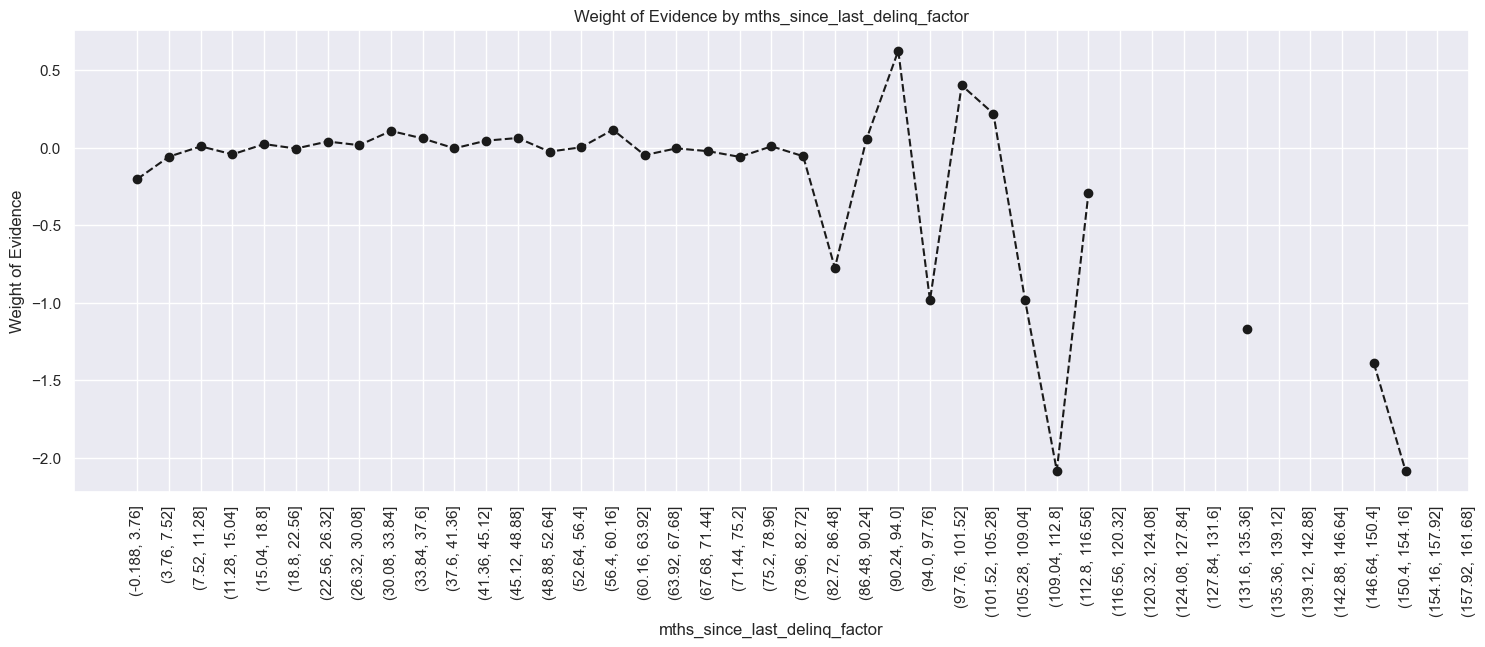

In [292]:
plot_by_woe(df_temp, 90)

In [293]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [294]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    745   0.875168    0.001997   652.0   93.0   
1         (0.4, 0.8]    808   0.919554    0.002166   743.0   65.0   
2         (0.8, 1.2]    922   0.895879    0.002472   826.0   96.0   
3         (1.2, 1.6]   1043   0.896453    0.002796   935.0  108.0   
4         (1.6, 2.0]   1172   0.901877    0.003142  1057.0  115.0   
5       (2.0, 2.399]   1337   0.913987    0.003584  1222.0  115.0   
6     (2.399, 2.799]   1538   0.913524    0.004123  1405.0  133.0   
7     (2.799, 3.199]   1696   0.903892    0.004547  1533.0  163.0   
8     (3.199, 3.599]   1927   0.898287    0.005166  1731.0  196.0   
9     (3.599, 3.999]   2197   0.913974    0.005890  2008.0  189.0   
10    (3.999, 4.399]   2466   0.914842    0.006611  2256.0  210.0   
11    (4.399, 4.799]   2571   0.915597    0.006892  2354.0  217.0   
12    (4.799, 5.199]   2906   0.909842    0.007790  2644.0  262.0   
13    (5.199, 5.599]   3083   0.907558    0.008265  2798.0  285.0   
14    (5.599, 5.999]   3252   0.919434    0.008718  2990.0  262.0   
15    (5.999, 6.398]   3529   0.907623    0.009460  3203.0  326.0   
16    (6.398, 6.798]   3766   0.908391    0.010096  3421.0  345.0   
17    (6.798, 7.198]   3899   0.910746    0.010452  3551.0  348.0   
18    (7.198, 7.598]   4239   0.914603    0.011364  3877.0  362.0   
19    (7.598, 7.998]   4508   0.911491    0.012085  4109.0  399.0   
20    (7.998, 8.398]   4677   0.910626    0.012538  4259.0  418.0   
21    (8.398, 8.798]   4895   0.907048    0.013122  4440.0  455.0   
22    (8.798, 9.198]   5129   0.904855    0.013750  4641.0  488.0   
23    (9.198, 9.598]   5191   0.904065    0.013916  4693.0  498.0   
24    (9.598, 9.998]   5471   0.908061    0.014666  4968.0  503.0   
25   (9.998, 10.397]   5621   0.905533    0.015069  5090.0  531.0   
26  (10.397, 10.797]   5824   0.905563    0.015613  5274.0  550.0   
27  (10.797, 11.197]   6116   0.894866    0.016396  5473.0  643.0   
28  (11.197, 11.597]   6168   0.909371    0.016535  5609.0  559.0   
29  (11.597, 11.997]   6303   0.901634    0.016897  5683.0  620.0   
30  (11.997, 12.397]   6457   0.904755    0.017310  5842.0  615.0   
31  (12.397, 12.797]   6789   0.894388    0.018200  6072.0  717.0   
32  (12.797, 13.197]   6667   0.901455    0.017873  6010.0  657.0   
33  (13.197, 13.597]   6769   0.897031    0.018146  6072.0  697.0   
34  (13.597, 13.997]   6854   0.895827    0.018374  6140.0  714.0   
35  (13.997, 14.396]   6855   0.898468    0.018377  6159.0  696.0   
36  (14.396, 14.796]   7081   0.902556    0.018982  6391.0  690.0   
37  (14.796, 15.196]   6964   0.897042    0.018669  6247.0  717.0   
38  (15.196, 15.596]   6811   0.899868    0.018259  6129.0  682.0   
39  (15.596, 15.996]   7059   0.889928    0.018924  6282.0  777.0   
40  (15.996, 16.396]   6862   0.892305    0.018395  6123.0  739.0   
41  (16.396, 16.796]   6873   0.890441    0.018425  6120.0  753.0   
42  (16.796, 17.196]   6958   0.883587    0.018653  6148.0  810.0   
43  (17.196, 17.596]   6752   0.885812    0.018101  5981.0  771.0   
44  (17.596, 17.996]   6774   0.886182    0.018159  6003.0  771.0   
45  (17.996, 18.395]   6832   0.880269    0.018315  6014.0  818.0   
46  (18.395, 18.795]   6737   0.886003    0.018060  5969.0  768.0   
47  (18.795, 19.195]   6472   0.879944    0.017350  5695.0  777.0   
48  (19.195, 19.595]   6613   0.880841    0.017728  5825.0  788.0   
49  (19.595, 19.995]   6570   0.880974    0.017613  5788.0  782.0   
50  (19.995, 20.395]   6236   0.879089    0.016717  5482.0  754.0   
51  (20.395, 20.795]   6199   0.879174    0.016618  5450.0  749.0   
52  (20.795, 21.195]   5981   0.870925    0.016034  5209.0  772.0   
53  (21.195, 21.595]   5921   0.878737    0.015873  5203.0  718.0   
54  (21.595, 21.995]   5793   0.874504    0.015530  5066.0  727.0   
55  (21.995, 22.394]   5510   0.870236    0.014771  4795.0  715.0   
56  (22.394, 22.794]   5476   0.874178    0.014680  4787.0  689.0   
57  (22.

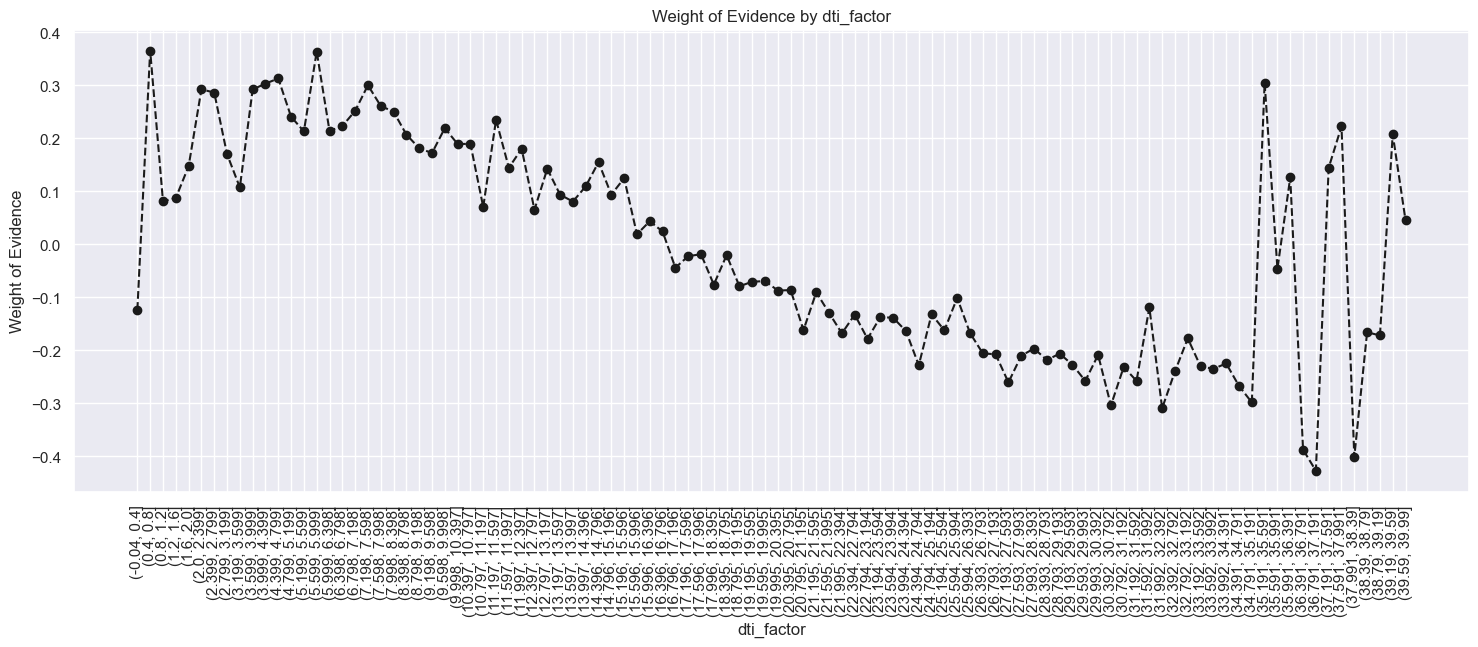

In [295]:
plot_by_woe(df_temp, 90)

In [296]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [297]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\2843865280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3900326773.py:4: FutureWarning: The default of observed=False is deprecated and wil

dti_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0   (-0.035, 0.7]   1366   0.893851    0.003690   1221.0   145.0     0.003714   
1      (0.7, 1.4]   1664   0.892428    0.004496   1485.0   179.0     0.004517   
2      (1.4, 2.1]   1986   0.911883    0.005365   1811.0   175.0     0.005509   
3      (2.1, 2.8]   2594   0.910563    0.007008   2362.0   232.0     0.007185   
4      (2.8, 3.5]   3135   0.902073    0.008470   2828.0   307.0     0.008603   
5      (3.5, 4.2]   3844   0.914152    0.010385   3514.0   330.0     0.010690   
6      (4.2, 4.9]   4595   0.911861    0.012414   4190.0   405.0     0.012746   
7      (4.9, 5.6]   5312   0.909827    0.014351   4833.0   479.0     0.014702   
8      (5.6, 6.3]   5927   0.913278    0.016013   5413.0   514.0     0.016467   
9      (6.3, 7.0]   6482   0.907436    0.017512   5882.0   600.0     0.017893   
10     (7.0, 7.7]   7256   0.915243    0.019603   6641.0   615.0     0.020202   
11     (7.7, 8.4]   8120   0.910591    0.021937   7394.0   726.0     0.022493   
12     (8.4, 9.1]   8817   0.904729    0.023820   7977.0   840.0     0.024266   
13     (9.1, 9.8]   9194   0.906787    0.024839   8337.0   857.0     0.025361   
14    (9.8, 10.5]   9888   0.906958    0.026714   8968.0   920.0     0.027281   
15   (10.5, 11.2]  10483   0.897644    0.028321   9410.0  1073.0     0.028625   
16   (11.2, 11.9]  10774   0.906998    0.029107   9772.0  1002.0     0.029727   
17   (11.9, 12.6]  11566   0.901176    0.031247  10423.0  1143.0     0.031707   
18   (12.6, 13.3]  11670   0.897344    0.031528  10472.0  1198.0     0.031856   
19   (13.3, 14.0]  12043   0.897202    0.032536  10805.0  1238.0     0.032869   
20   (14.0, 14.7]  12212   0.900999    0.032992  11003.0  1209.0     0.033471   
21   (14.7, 15.4]  11941   0.897329    0.032260  10715.0  1226.0     0.032595   
22   (15.4, 16.1]  12117   0.894776    0.032736  10842.0  1275.0     0.032982   
23   (16.1, 16.8]  12054   0.890493    0.032566  10734.0  1320.0     0.032653   
24   (16.8, 17.5]  12222   0.884307    0.033019  10808.0  1414.0     0.032878   
25   (17.5, 18.2]  11921   0.888181    0.032206  10588.0  1333.0     0.032209   
26   (18.2, 18.9]  11753   0.878414    0.031752  10324.0  1429.0     0.031406   
27   (18.9, 19.6]  11242   0.881961    0.030372   9915.0  1327.0     0.030162   
28   (19.6, 20.3]  11286   0.878699    0.030491   9917.0  1369.0     0.030168   
29   (20.3, 21.0]  10987   0.879494    0.029683   9663.0  1324.0     0.029395   
30   (21.0, 21.7]  10285   0.875061    0.027786   9000.0  1285.0     0.027378   
31   (21.7, 22.4]   9797   0.872308    0.026468   8546.0  1251.0     0.025997   
32   (22.4, 23.1]   9475   0.871451    0.025598   8257.0  1218.0     0.025118   
33   (23.1, 23.8]   9229   0.873226    0.024933   8059.0  1170.0     0.024516   
34   (23.8, 24.5]   8858   0.870738    0.023931   7713.0  1145.0     0.023463   
35   (24.5, 25.2]   8115   0.867776    0.021924   7042.0  1073.0     0.021422   
36   (25.2, 25.9]   6944   0.873272    0.018760   6064.0   880.0     0.018447   
37   (25.9, 26.6]   6676   0.869533    0.018036   5805.0   871.0     0.017659   
38   (26.6, 27.3]   6168   0.866569    0.016664   5345.0   823.0     0.016260   
39   (27.3, 28.0]   5865   0.863257    0.015845   5063.0   802.0     0.015402   
40   (28.0, 28.7]   5588   0.866858    0.015097   4844.0   744.0     0.014736   
41   (28.7, 29.4]   5119   0.864427    0.013830   4425.0   694.0     0.013461   
42   (29.4, 30.1]   4522   0.860239    0.012217   3890.0   632.0     0.011833   
43   (30.1, 30.8]   3451   0.860041    0.009323   2968.0   483.0     0.009029   
44   (30.8, 31.5]   3295   0.861002    0.008902   2837.0   458.0     0.008630   
45   (31.5, 32.2]   2945   0.869949    0.007956   2562.0   383.0     0.007794   
46   (32.2, 32.9]   2617   0.857088    0.007070   2243.0   374.0     0.006823   
47   (32.9, 33.6]   2438   0.867104    0.006587   2114.0   324.0     0.006431   
48   (33.6, 34.3]   2321   0.865144   

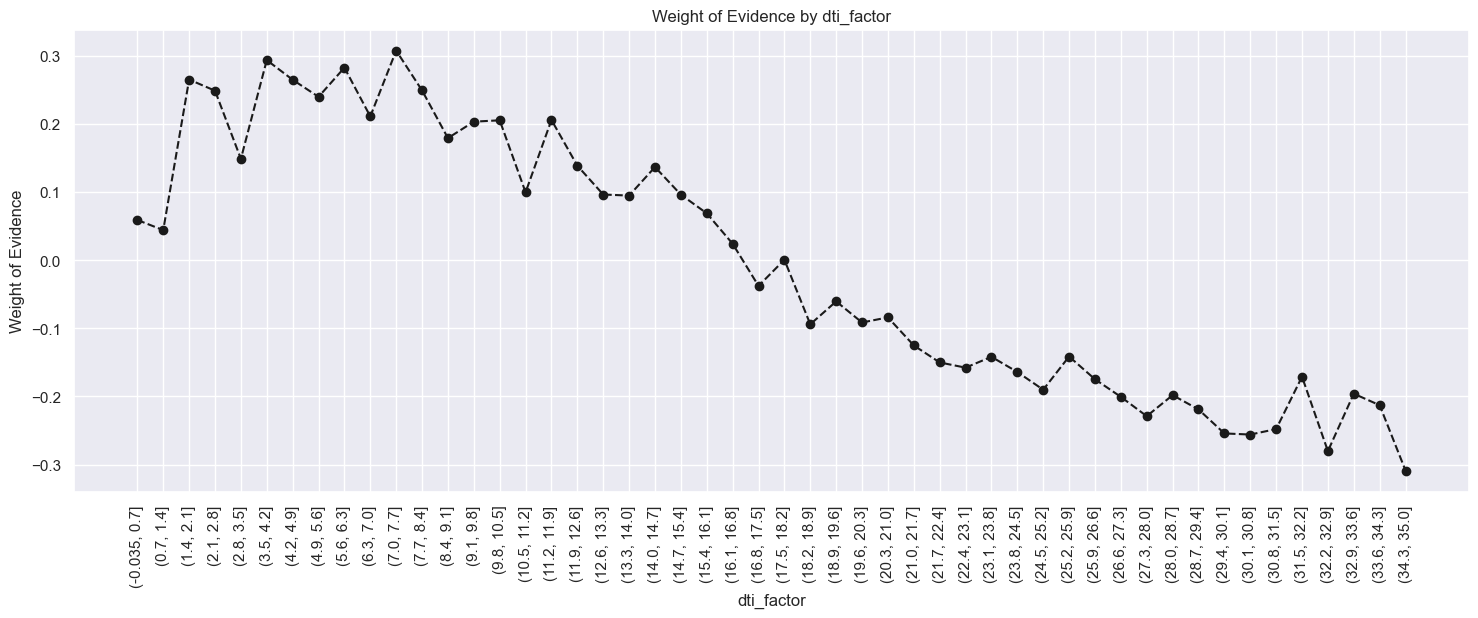

In [298]:
plot_by_woe(df_temp, 90)

In [299]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3828360169.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3828360169.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykerne

In [300]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\770603847.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\770603847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\Apratim Narayan\AppData\Local\Temp\ipyke

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.121, 2.42]   1086   0.763352    0.021691   829.0  257.0   
1                   (2.42, 4.84]     76   0.894737    0.001518    68.0    8.0   
2                   (4.84, 7.26]    163   0.914110    0.003256   149.0   14.0   
3                   (7.26, 9.68]    156   0.903846    0.003116   141.0   15.0   
4                   (9.68, 12.1]    292   0.904110    0.005832   264.0   28.0   
5                  (12.1, 14.52]    207   0.917874    0.004134   190.0   17.0   
6                 (14.52, 16.94]    210   0.919048    0.004194   193.0   17.0   
7                 (16.94, 19.36]    334   0.904192    0.006671   302.0   32.0   
8                 (19.36, 21.78]    283   0.925795    0.005652   262.0   21.0   
9                  (21.78, 24.2]    455   0.896703    0.009088   408.0   47.0   
10                 (24.2, 26.62]    339   0.905605    0.006771   307.0   32.0   
11                (26.62, 29.04]    612   0.895425    0.012224   548.0   64.0   
12                (29.04, 31.46]    451   0.900222    0.009008   406.0   45.0   
13                (31.46, 33.88]    487   0.921971    0.009727   449.0   38.0   
14                 (33.88, 36.3]    780   0.919231    0.015579   717.0   63.0   
15                 (36.3, 38.72]    659   0.934750    0.013162   616.0   43.0   
16                (38.72, 41.14]   1008   0.917659    0.020133   925.0   83.0   
17                (41.14, 43.56]    812   0.924877    0.016218   751.0   61.0   
18                (43.56, 45.98]    791   0.924147    0.015799   731.0   60.0   
19                 (45.98, 48.4]   1316   0.922492    0.026285  1214.0  102.0   
20                 (48.4, 50.82]    945   0.917460    0.018875   867.0   78.0   
21                (50.82, 53.24]   1536   0.905599    0.030679  1391.0  145.0   
22                (53.24, 55.66]   1062   0.911488    0.021212   968.0   94.0   
23                (55.66, 58.08]   1662   0.912154    0.033196  1516.0  146.0   
24                 (58.08, 60.5]   1095   0.912329    0.021871   999.0   96.0   
25                 (60.5, 62.92]   1213   0.904369    0.024228  1097.0  116.0   
26                (62.92, 65.34]   1631   0.901288    0.032576  1470.0  161.0   
27                (65.34, 67.76]   1088   0.917279    0.021731   998.0   90.0   
28                (67.76, 70.18]   1513   0.906808    0.030220  1372.0  141.0   
29                 (70.18, 72.6]   1041   0.902017    0.020792   939.0  102.0   
30                 (72.6, 75.02]   1420   0.898592    0.028362  1276.0  144.0   
31                (75.02, 77.44]    946   0.892178    0.018895   844.0  102.0   
32                (77.44, 79.86]    939   0.899894    0.018755   845.0   94.0   
33                (79.86, 82.28]   1351   0.880829    0.026984  1190.0  161.0   
34                 (82.28, 84.7]    724   0.882597    0.014461   639.0   85.0   
35                 (84.7, 87.12]   1350   0.855556    0.026964  1155.0  195.0   
36                (87.12, 89.54]    822   0.863747    0.016418   710.0  112.0   
37                (89.54, 91.96]    904   0.857301    0.018056   775.0  129.0   
38                (91.96, 94.38]   1492   0.865282    0.029800  1291.0  201.0   
39                 (94.38, 96.8]   1145   0.847162    0.022869   970.0  175.0   
40                 (96.8, 99.22]   1821   0.881384    0.036371  1605.0  216.0   
41               (99.22, 101.64]   1258   0.860890    0.025126  1083.0  175.0   
42              (101.64, 104.06]   2096   0.875477    0.041864  1835.0  261.0   
43              (104.06, 106.48]   1536   0.870443    0.030679  1337.0  199.0   
44               (106.48, 108.9]   1559   0.883258    0.031138  1377.0  182.0   
45               (108.9, 111.32]   2296   0.880662    0.045859  2022.0  274.0   
46              (111.32, 113.74]   1461   0.885010    0.029181  1293.0  168.0   
47              (113.74, 116.16]   2037   0.863034    0.040685  1758.0  279.0   
48              (116.16, 118.58]  

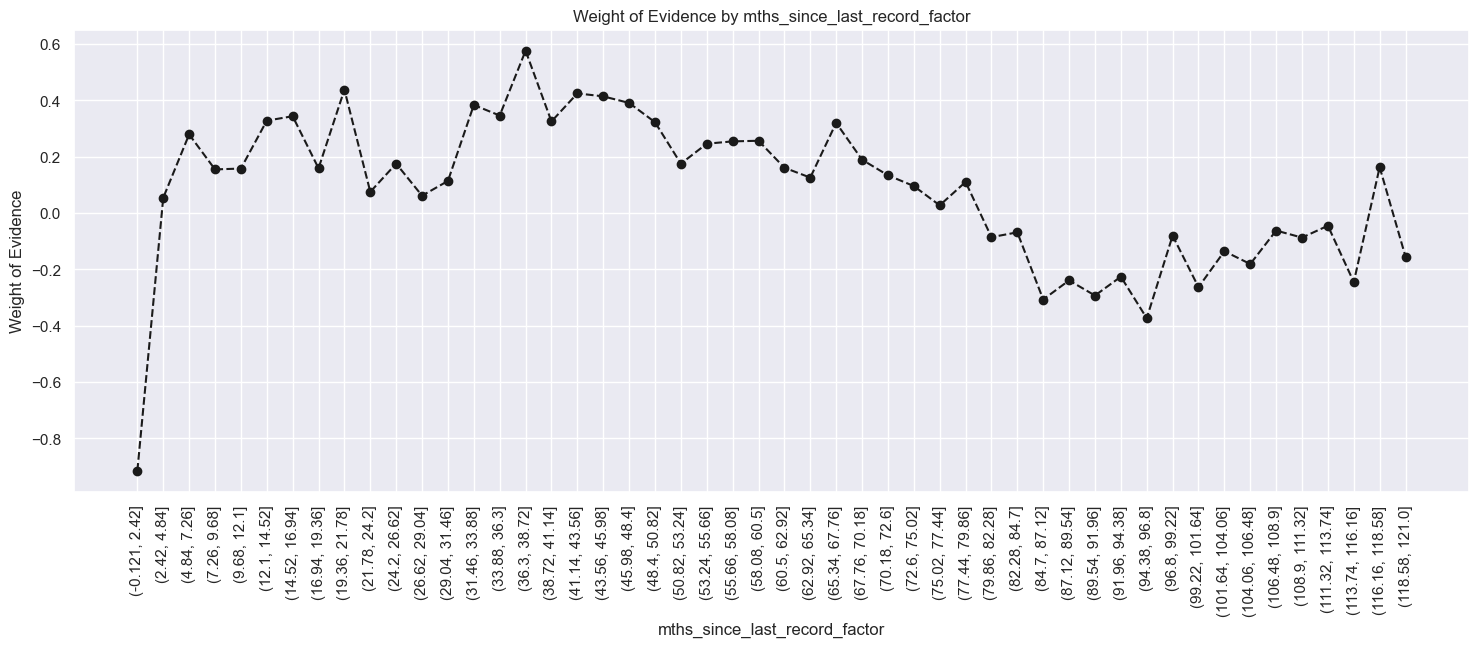

In [301]:
plot_by_woe(df_temp, 90)

In [302]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3220700279.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
C:\Users\Apratim Narayan\AppData\Local\Temp\ipykernel_23300\3220700279.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
C:\

### Preprocessing the Test Dataset

In [303]:
loan_data_inputs_train = df_inputs_prepr
#loan_data_inputs_test = df_inputs_prepr


In [304]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(373028, 322)
(373028,)
(93257, 322)
(93257,)


In [305]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')